# Checking Results

In [5]:
import pandas as pd
import pygmo as pg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [6]:
configs = pd.read_csv('GRU/Final_experiments/dataset_1/results_no_cv_HO_14_12_MO').iloc[:300]

In [7]:
configs.head()

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,1.181496e+02,9.547102e+01,-8.401320,0.539599,1.145878e+02,1.008391e+02,-14.996822,0.552505,"{""num_rec"": 1, ""max_time"": 23, ""neuron_0"": 22,..."
1,3.871338e+01,2.933810e+01,0.356078,15.063834,3.744115e+01,3.006062e+01,0.127134,15.859310,"{""num_rec"": 1, ""max_time"": 31, ""neuron_0"": 24,..."
2,4.784384e+01,3.659232e+01,0.118531,5.907845,4.567716e+01,3.656544e+01,-0.127551,5.832887,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 80,..."
3,4.544020e+01,3.409842e+01,0.070034,8.355793,4.167088e+01,3.360285e+01,-0.126457,8.494248,"{""num_rec"": 1, ""max_time"": 27, ""neuron_0"": 95,..."
4,8.396453e+10,1.083317e+09,-0.000166,0.407556,1.066565e+09,1.068397e+08,-0.010136,0.411235,"{""num_rec"": 1, ""max_time"": 21, ""neuron_0"": 52,..."


In [8]:
configs.shape

(300, 9)

In [9]:
scaler = MinMaxScaler()
norm_cfgs = scaler.fit_transform(configs[['rmse_test', 'uncertainty_test']])

In [10]:
hyper_volume =[]
for i in range(norm_cfgs.shape[0]):
    hv = pg.hypervolume(norm_cfgs[:i+1])
    hyper_volume.append(hv.compute(ref_point=[1.1,1.1]))

hyper_volume = np.array(hyper_volume)

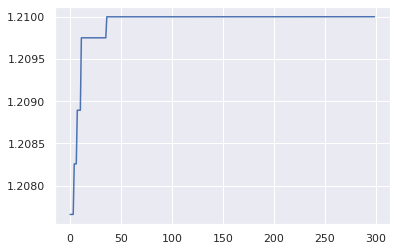

In [11]:
plt.plot(np.arange(hyper_volume.shape[0]), hyper_volume)

In [12]:
configs.head()

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,1.181496e+02,9.547102e+01,-8.401320,0.539599,1.145878e+02,1.008391e+02,-14.996822,0.552505,"{""num_rec"": 1, ""max_time"": 23, ""neuron_0"": 22,..."
1,3.871338e+01,2.933810e+01,0.356078,15.063834,3.744115e+01,3.006062e+01,0.127134,15.859310,"{""num_rec"": 1, ""max_time"": 31, ""neuron_0"": 24,..."
2,4.784384e+01,3.659232e+01,0.118531,5.907845,4.567716e+01,3.656544e+01,-0.127551,5.832887,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 80,..."
3,4.544020e+01,3.409842e+01,0.070034,8.355793,4.167088e+01,3.360285e+01,-0.126457,8.494248,"{""num_rec"": 1, ""max_time"": 27, ""neuron_0"": 95,..."
4,8.396453e+10,1.083317e+09,-0.000166,0.407556,1.066565e+09,1.068397e+08,-0.010136,0.411235,"{""num_rec"": 1, ""max_time"": 21, ""neuron_0"": 52,..."


In [13]:
pareto_index = pg.non_dominated_front_2d(configs[['rmse_test', 'uncertainty_test']])

In [14]:
pareto_configs = configs.iloc[pareto_index]

In [15]:
pareto_configs

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
187,7.456208,5.252828,9.437999e-01,6.201423,8.109570,5.118478,8.949457e-01,5.871751,"{""num_rec"": 2, ""max_time"": 30, ""neuron_0"": 84,..."
263,8.469563,5.409419,9.356169e-01,6.161230,9.267965,5.459378,8.765050e-01,5.855034,"{""num_rec"": 2, ""max_time"": 38, ""neuron_0"": 77,..."
101,12.510084,8.137508,8.328499e-01,4.059068,10.238922,6.424408,8.192457e-01,3.280721,"{""num_rec"": 1, ""max_time"": 24, ""neuron_0"": 72,..."
290,12.795417,8.243829,8.363770e-01,3.656610,10.306455,6.610912,8.294439e-01,2.854231,"{""num_rec"": 1, ""max_time"": 30, ""neuron_0"": 68,..."
267,21.028823,17.815836,4.855338e-01,2.856778,19.362239,16.825543,3.236094e-01,2.271743,"{""num_rec"": 1, ""max_time"": 38, ""neuron_0"": 49,..."
165,40.479117,33.665333,-7.214077e+01,0.424531,34.301178,29.694165,-1.379879e+02,0.357122,"{""num_rec"": 2, ""max_time"": 38, ""neuron_0"": 37,..."
65,41.895494,37.012292,-1.297918e+11,0.000086,37.589225,31.776686,-2.453531e+17,0.000008,"{""num_rec"": 2, ""max_time"": 24, ""neuron_0"": 79,..."


In [16]:
pareto_configs.loc[187].net_cfg

'{"num_rec": 2, "max_time": 30, "neuron_0": 84, "neuron_1": 38, "neuron_2": 52, "activation_rec_0": "sigmoid", "activation_rec_1": "tanh", "activation_rec_2": "tanh", "rec_dropout_norm_0": 0.24029640530008275, "rec_dropout_norm_1": 0.47268487647610613, "rec_dropout_norm_2": 0.29820352354933377, "recurrent_dropout_0": 0.012285165175023748, "recurrent_dropout_1": 0.3293396516199814, "recurrent_dropout_2": 0.2121952809065241, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 62, "rul": 113, "rul_style": "nonlinear", "lr": "1e-4", "batch": "64", "num_den": 2, "neuron_den_0": 71, "neuron_den_1": 27, "neuron_den_2": 68, "activation_den_0": "sigmoid", "activation_den_1": "sigmoid", "activation_den_2": "sigmoid", "dropout_0": 0.18207609281622392, "dropout_1": 0.5925208723880789, "dropout_2": 0.5323343040227004}'

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

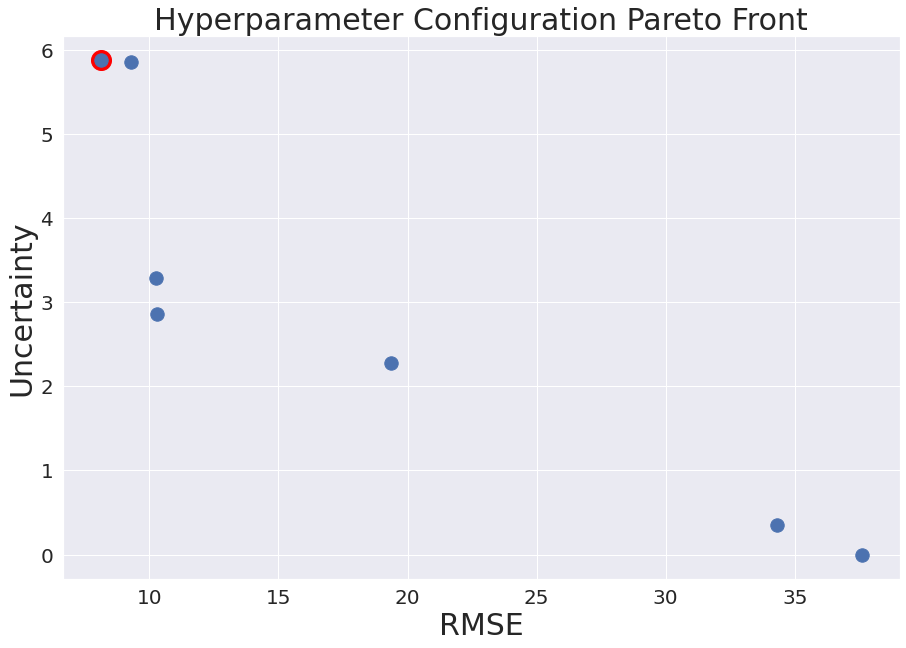

In [17]:
x = pareto_configs['rmse_test'].values
y = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
plt.scatter(x[0], y[0], s=400, facecolors='red')
plt.scatter(x, y, s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configuration Pareto Front', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.savefig('./paper_figures/cmapss_1.pdf', format='pdf')


# for i, txt in enumerate(pareto_configs.index):
#     plt.annotate(txt, (x[i], y[i]))

# Checking if changes work

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

import tensorflow as tf
from preprocessing import build_data
import pandas as pd
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from activations import Activate
from losses import CustomLoss
from preprocessing import build_data


import main



In [2]:
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)

In [1]:
model, train_results_df, test_results_df, test_x_orig, test_y_orig, scaler, train_x, test_x = main.main()
# model = main.main()

NameError: name 'main' is not defined

In [2]:
import numpy as np

In [3]:
if np.isfinite(np.array([1]).mean()) and np.isfinite(np.array([2]).mean()):
    print('ha')

ha


In [4]:
model

In [10]:
# model.save('./toy_model')

In [9]:
# new_model = tf.keras.models.load_model('./toy_model', custom_objects={"CustomLoss": CustomLoss, "Activate": Activate})

# Building model incrementally

In [100]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  #"1,2,3,4,5"  # uncomment in case running ONLY on CPU is required

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras import backend as k
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import History
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

from activations import Activate
from losses import CustomLoss
from preprocessing import build_data

import numpy as np
import pandas as pd
import math
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [168]:
net_cfg = {
     "max_time": 100,
     "lr": "0.001",
     "num_rec": 3,
     "neuron_0": 100,
     "activation_0": "tanh",
     "dropout_0": 0.25,
     "recurrent_dropout_0": 0.25,
     "neuron_1": 50,
     "activation_1": "tanh",
     "dropout_1": 0.25,
     "recurrent_dropout_1": 0.25,
     "neuron_2": 20,
     "activation_2": "tanh",
     "dropout_2": 0.25,
     "recurrent_dropout_2": 0.25,
     "final_activation_0": "exp",
     "final_activation_1": "softplus",
     "percentage": 50,
     "rul": 115,
     "rul_style": "nonlinear",
     "batch": "128",
}

In [176]:
cfg = {
        "cv": 10,
        "shuffle": True,
        "random_state": 21,
        "mask_value": -99,
        "reps": 30,
        "epochs": 10,
        "batches": 64,
        "in_reps": 10,
    }

In [177]:
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)

In [178]:
def weibull_pdf(alpha, beta, t):
    return (beta/alpha) * (t/alpha)**(beta-1)*np.exp(- (t/alpha)**beta)

In [179]:
def weibull_median(alpha, beta):
    return alpha*(-np.log(.5))**(1/beta)

In [180]:
def weibull_mode(alpha, beta):
    # assert np.all(beta > 1)
    return alpha * ((beta-1)/beta)**(1/beta)

In [181]:
def weibull_variance(alpha, beta):
    var = alpha**2*(math.gamma(1+2/beta)-math.gamma(1+1/beta)**2)
    return var

In [182]:
def network(train_X, train_y, test_x, test_y, net_cfg, cfg):

    strategy = tf.distribute.MirroredStrategy()
    print("Number of devices: {}".format(strategy.num_replicas_in_sync))
    k.set_epsilon(1e-10)
    history = History()
    nan_terminator = callbacks.TerminateOnNaN()
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss')
    early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5)
    # checkpoint_filepath = './saved_models/cp-{epoch:04d}.ckpt'
    # checkpoint = callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='loss', verbose=1)
    # logdir="logs/test1" #+ datetime.now().strftime("%Y%m%d-%H%M%S")
    # tensorboard = callbacks.TensorBoard(log_dir=logdir)

    window = train_X.shape[1]
    n_features = train_X.shape[2]

    # with strategy.scope():  # Create a MirroredStrategy.

    inputs = keras.Input(shape=(window, n_features))
    masking_layer = keras.layers.Masking(mask_value=cfg['mask_value'])(inputs)

    # recurrent layers
    if net_cfg['num_rec'] > 1:
        for i in np.arange(net_cfg['num_rec']-1):
            masking_layer = keras.layers.GRU(net_cfg['neuron_'+str(i)], activation=net_cfg['activation_'+str(i)],
                                    dropout=net_cfg['dropout_'+str(i)],
                                    recurrent_dropout=net_cfg['recurrent_dropout_'+str(i)],
                                    return_sequences=True)(masking_layer)
    last = i + 1
    gru_last = keras.layers.GRU(net_cfg['neuron_'+str(last)], activation=net_cfg['activation_'+str(last)],
                                dropout=net_cfg['dropout_'+str(last)],
                                recurrent_dropout=net_cfg['recurrent_dropout_'+str(last)],
                                return_sequences=False)(masking_layer)

    dense_1 = keras.layers.Dense(2)(gru_last)
    custom_activation = Activate(net_cfg=net_cfg)
    outputs = keras.layers.Activation(custom_activation)(dense_1)

    model = keras.Model(inputs=inputs, outputs=outputs, name="weibull_params")

    # rmse = tf.keras.metrics.RootMeanSquaredError()
    model.compile(loss=CustomLoss(kind='continuous', reduce_loss=True), optimizer=Adam(lr=eval(net_cfg['lr']),
                                                                                    clipvalue=0.5))
    model.summary()  # uncomment for debugging

    batch_size=eval(net_cfg['batch'])
    model.fit(train_X, train_y,
              epochs=cfg['epochs'],
              batch_size=batch_size,
              validation_data=(test_x, test_y),
              verbose=1,
              callbacks=[nan_terminator, history, reduce_lr, early_stopping],#, checkpoint, tensorboard],  # , tensorboard
              workers=32)

    return model, history



In [183]:
def load_data():

    np.random.seed(42)

    id_col = 'unit_number'
    time_col = 'time'
    feature_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + ['sensor_measurement_{}'.format(x) for x in
                                                                       range(1, 22)]
    column_names = [id_col, time_col] + feature_cols

    train_x_orig = pd.read_csv('./DataSets/CMAPSS/train_FD001.csv', header=None, sep='\s+', decimal=".")
    train_x_orig.columns = column_names

    test_x_orig = pd.read_csv('./DataSets/CMAPSS/test_FD001.csv', header=None, sep='\s+', decimal=".")
    test_x_orig.columns = column_names

    test_y_orig = pd.read_csv('./DataSets/CMAPSS/RUL_FD001.csv', header=None, names=['T'])

    # Make engine numbers and days zero-indexed
    train_x_orig.iloc[:, 0:2] -= 1
    test_x_orig.iloc[:, 0:2] -= 1

    train_idx = np.random.choice(range(train_x_orig.unit_number.unique().max()+1), replace=False, size=80)  # selecting 80 units for training
    train_idx.sort()

    vld_idx = np.array([x for x in range(train_x_orig.unit_number.unique().max()+1) if x not in train_idx])  # remaining are validation indices

    train_or = train_x_orig[train_x_orig.unit_number.isin(train_idx)]  # training data
    train_or.reset_index(drop=True, inplace=True)
    vld = train_x_orig[train_x_orig.unit_number.isin(vld_idx)]  # validation data
    vld.reset_index(drop=True, inplace=True)


    # Truncating the validation data randomly 5 times each
    vld_trunc = []
    test_y = []
    max_cycle = []
    test_index = []  # for debugging purposes
    temp_or_test_cycles = []
    counter = -1

    for i in set(vld.unit_number.unique()):
        # print(f'unit number is {i}')
        for j in range(1,6):  # 5 truncations per instance
            counter += 1
            np.random.seed(i*j)
            temp_df = vld[vld.unit_number == i]
            temp_df.reset_index(drop=True, inplace=True)  # important
            length = temp_df.shape[0]
            # print(length)
            temp_or_test_cycles.append(length)
            level = np.random.choice(np.arange(5, 96), 1)[0]
            r = np.int(length * (1 - level / 100))
            # test_index.append(X_test_or[X_test_or.unit_number == i].index.tolist()[
            #                     :r + 1])  # check this with train_x_orig instead of X_test_or (probably it's the same)
            temp_df = temp_df.truncate(after=r)
            # print(temp_df.shape[0])
            # print('\n')
            temp_df['unit_number'] = np.repeat(counter, temp_df.shape[0])
            vld_trunc.append(temp_df)
            max_cycle.append(length)


    # test_index = [item for sublist in test_index for item in sublist]

    vld_trunc = pd.concat(vld_trunc)
    vld_trunc.reset_index(drop=True, inplace=True)
    # print(f'max len per unit is {max_cycle}')


    # Pre-processing data
    scaler = pipeline.Pipeline(steps=[
        ('minmax', MinMaxScaler(feature_range=(-1, 1))),
        ('remove_constant', VarianceThreshold())])

    train = train_or.copy()
    train = np.concatenate([train[['unit_number', 'time']], scaler.fit_transform(train[feature_cols])], axis=1)

    train_x, train_y = build_data(units=train[:, 0], time=train[:, 1], x=train[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=False, mask_value=cfg['mask_value'],
                                    original_data=None, net_cfg = net_cfg, label=net_cfg['rul_style'])

    vld = vld_trunc.copy()
    vld = np.concatenate([vld[['unit_number', 'time']], scaler.transform(vld[feature_cols])], axis=1)
    test_x, test_y = build_data(units=vld[:, 0],
        time=vld[:, 1],
        x=vld[:, 2:],
        max_time=net_cfg["max_time"],
        is_test=True,
        mask_value=cfg["mask_value"],
        original_data=np.array(max_cycle),
        net_cfg=net_cfg,
        label=net_cfg["rul_style"],
    )

    return train_x, train_y, test_x, test_y, train_or, vld_trunc

In [184]:
train_x, train_y, test_x, test_y, train, test = load_data()
print('train_x', train_x.shape, 'train_y', train_y.shape, 'test_x', test_x.shape, 'test_y', test_y.shape, 'train', train.shape, 'test', test.shape)



100%|██████████| 100/100 [00:00<00:00, 7680.75it/s]

train_x (16340, 100, 17) train_y (16340, 1) test_x (100, 100, 17) test_y (100, 1) train (16340, 26) test (10312, 26)


In [185]:
k.clear_session()
try:
    del model
except:
    pass

model, history = network(train_x, train_y, test_x, test_y, net_cfg, cfg)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


Number of devices: 1


/home/kefalasm/rul_nn/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "weibull_params"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 17)]         0         
_________________________________________________________________
masking (Masking)            (None, 100, 17)           0         
_________________________________________________________________
gru (GRU)                    (None, 100, 100)          35700     
_________________________________________________________________
gru_1 (GRU)                  (None, 100, 50)           22800     
_________________________________________________________________
gru_2 (GRU)                  (None, 20)                4320      
_________________________________________________________________
dense (Dense)                (None, 2)                 42        
_________________________________________________________________
activation (Activation)      (None, 2)              

In [186]:
model.save('./toy_model')

INFO:tensorflow:Assets written to: ./toy_model/assets


INFO:tensorflow:Assets written to: ./toy_model/assets


In [124]:
# model = tf.keras.models.load_model('./toy_model', custom_objects={"CustomLoss": CustomLoss, "Activate": Activate})

In [161]:
model

In [15]:
model.get_config()['output_layers']

[['activation', 0, 0]]

In [196]:
train_predict_1 = []
train_predict_2 = []

success = True

for i in range(cfg['reps']):
    tf.random.set_seed(i)
    train_predict = model(train_x, training=True).numpy()
    train_predict_1.append(train_predict[:, 0].reshape(train_predict[:, 0].shape[0], 1))
    train_predict_2.append(train_predict[:, 1].reshape(train_predict[:, 1].shape[0], 1))

train_predict_1_mean = np.median(np.hstack(train_predict_1), axis=1)
train_predict_2_mean = np.median(np.hstack(train_predict_2), axis=1)
train_predict_1_mean = train_predict_1_mean.reshape(train_predict_1_mean.shape[0], 1)
train_predict_2_mean = train_predict_2_mean.reshape(train_predict_2_mean.shape[0], 1)
train_predict_1_std = np.std(np.hstack(train_predict_1), axis=1)
train_predict_2_std = np.std(np.hstack(train_predict_2), axis=1)
train_predict_1_std = train_predict_1_std.reshape(train_predict_1_std.shape[0], 1)
train_predict_2_std = train_predict_2_std.reshape(train_predict_2_std.shape[0], 1)

train_predict = np.hstack([train_predict_1_mean, train_predict_2_mean,
                            train_predict_1_std, train_predict_2_std])

train_predict = np.resize(train_predict, (train_x.shape[0], 4))  # changed from 2 to 4
train_result = np.concatenate((train_y, train_predict), axis=1)
train_results_df_old = pd.DataFrame(train_result, columns=['T', 'mean_alpha', 'mean_beta', 'std_alpha',
                                                        'std_beta'])  # (add 'E' for event)
train_results_df_old['unit_number'] = train['unit_number'].to_numpy()
train_results_df_old['time'] = train['time'].to_numpy()

train_results_df_old['predicted_mu'] = train_results_df_old[['mean_alpha', 'mean_beta']].apply(
    lambda row: weibull_mean(row[0], row[1]), axis=1)

In [20]:
train_predict_1 = np.array(train_predict_1)

In [21]:
train_predict_2 = np.array(train_predict_2)

In [22]:
train_predict_1.shape

(30, 16340, 1)

In [23]:
train_predict_1.resize(30, 16340)

In [24]:
train_predict_2.resize(30, 16340)

In [25]:
train_predict_1[:,1]

array([132.97829 , 123.23054 , 124.54932 , 122.32817 , 120.403915,
       130.73293 , 104.53065 , 119.13004 , 113.69697 , 153.43895 ,
       152.46115 , 122.44974 , 125.80001 , 120.75015 , 107.46349 ,
       114.002716, 125.00156 , 111.63954 , 108.24521 , 108.84976 ,
       139.0864  , 137.08862 , 118.6768  , 118.238594, 134.57979 ,
       138.68983 , 126.762245, 115.65711 , 139.75046 , 135.50706 ],
      dtype=float32)

In [40]:
train_predict_1[:,16339]

array([ 0.41705817, 12.625637  ,  0.63515407,  7.228504  ,  3.1942136 ,
        0.07566568,  2.8691864 ,  1.387541  ,  4.0971513 ,  5.763522  ,
       14.557368  , 12.584854  ,  3.7971506 ,  1.4213378 ,  6.7815943 ,
        4.707724  ,  0.19926678,  2.8029566 ,  5.4847    ,  3.3876393 ,
        0.5993108 ,  1.0875534 ,  7.0147896 ,  2.7878008 ,  3.4252214 ,
        7.5762835 ,  0.1216777 ,  0.4439667 ,  0.1773132 ,  0.9611091 ],
      dtype=float32)

In [27]:
train_predict_2[:,1]

array([14.678265, 15.838853, 15.775572, 14.408605, 16.353857, 14.302875,
       15.161706, 16.727022, 15.966782, 12.435256, 13.328977, 16.388186,
       15.86963 , 16.508802, 15.440501, 15.19744 , 16.054945, 15.993076,
       15.267684, 16.106028, 15.3978  , 15.539538, 16.215986, 16.234024,
       14.858935, 14.238721, 14.513758, 16.973845, 15.03419 , 15.020367],
      dtype=float32)

In [39]:
train_predict_2[:,16339]

array([5.8427448e-03, 4.9685388e+00, 3.4116201e-02, 2.3138850e+00,
       1.6480570e+00, 8.2829857e-04, 1.0383902e+00, 1.1439174e+00,
       2.5860670e+00, 3.9850752e+00, 4.9656487e+00, 5.6004195e+00,
       2.4956729e+00, 3.6161962e-01, 3.0081646e+00, 2.4999211e+00,
       3.5001922e-03, 1.5262645e+00, 3.6114802e+00, 1.1387600e+00,
       6.9223523e-02, 2.2952071e-01, 2.7980986e+00, 2.5398455e+00,
       1.5327101e+00, 3.9090512e+00, 6.5446319e-04, 1.4355426e-03,
       1.4663087e-03, 1.6815068e-01], dtype=float32)

In [32]:
weib_tests_old = []
for a,b in zip(train_predict_1[:, 16339], train_predict_2[:, 16339]):
    weib_tests_old.append(a * np.random.weibull(b, cfg["in_reps"]))

weib_tests_old = np.array(weib_tests_old)

In [33]:
weib_tests_old.shape

(30, 10)

In [34]:
np.isinf(weib_tests_old).sum()

6

In [35]:
weib_tests_old

array([[1.03548105e-091, 1.18890112e-011, 2.14093963e+113,
        1.32122409e+000, 2.74676193e-108, 2.25286390e-184,
        5.39889323e-212, 3.99865490e+047, 9.36530096e+046,
        5.38124627e+055],
       [1.66505781e+001, 8.35894106e+000, 1.11503345e+001,
        1.50562481e+001, 7.47121026e+000, 1.51222583e+001,
        1.36188747e+001, 1.27515154e+001, 1.02780670e+001,
        8.09552990e+000],
       [2.02412786e-023, 1.11960845e+001, 5.46507616e-009,
        3.25045649e+012, 2.20373050e-035, 1.73462270e+007,
        8.27133346e+010, 2.17671201e+015, 9.03276339e+015,
        3.75325046e+009],
       [1.17186163e+001, 2.62312949e+000, 1.37077904e+001,
        5.48382404e+000, 6.68961391e+000, 2.80010348e+000,
        4.35862926e+000, 6.17466251e+000, 5.84394461e+000,
        5.53020167e+000],
       [1.79220715e+000, 3.14322193e+000, 1.64925369e+000,
        2.98592237e+000, 1.27158312e+000, 3.24208788e+000,
        4.38814381e+000, 1.82020060e+000, 2.36998617e+000,
        3.1

In [36]:
mean_a_old = np.mean(train_predict_1[:, 16339])

In [37]:
mean_b_old = np.mean(train_predict_2[:, 16339])

In [38]:
weibull_mean(mean_a_old, mean_b_old)

3.503604979558454

In [27]:
train_results_df_old.shape

(16340, 8)

In [197]:
s = train_results_df_old[train_results_df_old.unit_number==3].iloc[::5]

In [198]:
s

,T,mean_alpha,mean_beta,std_alpha,std_beta,unit_number,time,predicted_mu
192,115.000000,167.048492,3.864671,38.779881,0.520524,3,0,151.118887
197,115.000000,113.492569,11.698293,4.837799,0.191233,3,5,108.654025
202,115.000000,113.724648,11.881313,4.963286,0.125416,3,10,108.940130
207,115.000000,115.153397,11.914815,6.167689,0.161325,3,15,110.320436
212,115.000000,114.557144,11.958870,3.427224,0.061974,3,20,109.764386
217,115.000000,114.265701,11.964808,3.701931,0.110746,3,25,109.487169
222,115.000000,115.057648,11.989979,3.859405,0.103454,3,30,110.254657
227,115.000000,114.839996,12.025646,3.801479,0.075383,3,35,110.058287
232,115.000000,113.221054,12.011677,4.182622,0.099346,3,40,108.502052
237,115.000000,113.433044,12.021233,4.515227,0.113484,3,45,108.708431


In [199]:
def plot_weibull_variance(results_df):

    plt.figure(figsize=(30,20))
    palette = sns.color_palette("RdBu_r", results_df.shape[0] + 1)
    color_dict = dict(enumerate(palette))

    for i, row in enumerate(results_df.iterrows()):
            alpha=row[1]['mean_alpha']
            beta = row[1]['mean_beta']
            color = color_dict[i]
            variance = weibull_variance(alpha, beta)

            plt.scatter(i, variance, color=color)
            plt.text(i, variance+0.5, i*5)
            plt.title('Weibull distributions variance')
            # plt.legend()


In [200]:
def plot_weibull_predictions(results_df):

    fig, axarr = plt.subplots(1, figsize=(30,20))

    t=np.arange(0,400)

    palette = sns.color_palette("RdBu_r", results_df.shape[0] + 1)
    color_dict = dict(enumerate(palette))

    for i, row in enumerate(results_df.iterrows()):
            alpha=row[1]['mean_alpha']
            beta = row[1]['mean_beta']
            T = row[1]['T']
            label = 'a={} b={}'.format(alpha, beta)

            color = color_dict[i]
            ax= axarr  #[0]
            mode = weibull_mode(alpha, beta)
            y_max = weibull_pdf(alpha, beta, mode)    

            ax.plot(t, weibull_pdf(alpha, beta, t), color=color)  # label=label
            ax.scatter(T, weibull_pdf(alpha,beta, T), color=color, s=100)
            ax.vlines(mode, ymin=0, ymax=y_max, colors=color, linestyles='--')
            ax.text(mode, y_max, i*5)

            ax.set_title('Weibull distributions')
            # ax.legend()
    
    # ax=axarr[1]
    
    # median_predictions = weibull_median(results_df['alpha'], results_df['beta'])
    # mean_predictions = results_df[['alpha', 'beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
    # mode_predictions = weibull_mode(results_df['alpha'], results_df['beta'])
#     x = results_df['time']
    
#     ax.scatter(x, results_df['T'], label='survival_time', color='black')

#     ax.scatter(results_df['T'], median_predictions, label='median_prediction')
#     ax.scatter(results_df['T'], mean_predictions, label='mean_prediction')
    # ax.scatter(results_df['T'], mode_predictions, label='m_prediction')
    # ax.set_title('MAP prediction Vs. true')
    

    # ax.legend()
    
    # ax=axarr[2]
    # sns.distplot(results_df['T'] - mode_predictions, ax=ax)
    # ax.set_title('Error')

#     ax.plot(x, results_df['alpha'], label='alpha')
#     ax.legend()
    
#     ax = axarr[3]
#     ax.plot(x, results_df['beta'], label='beta')
#     ax.legend()
    
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     fig.suptitle(title)
    plt.show()


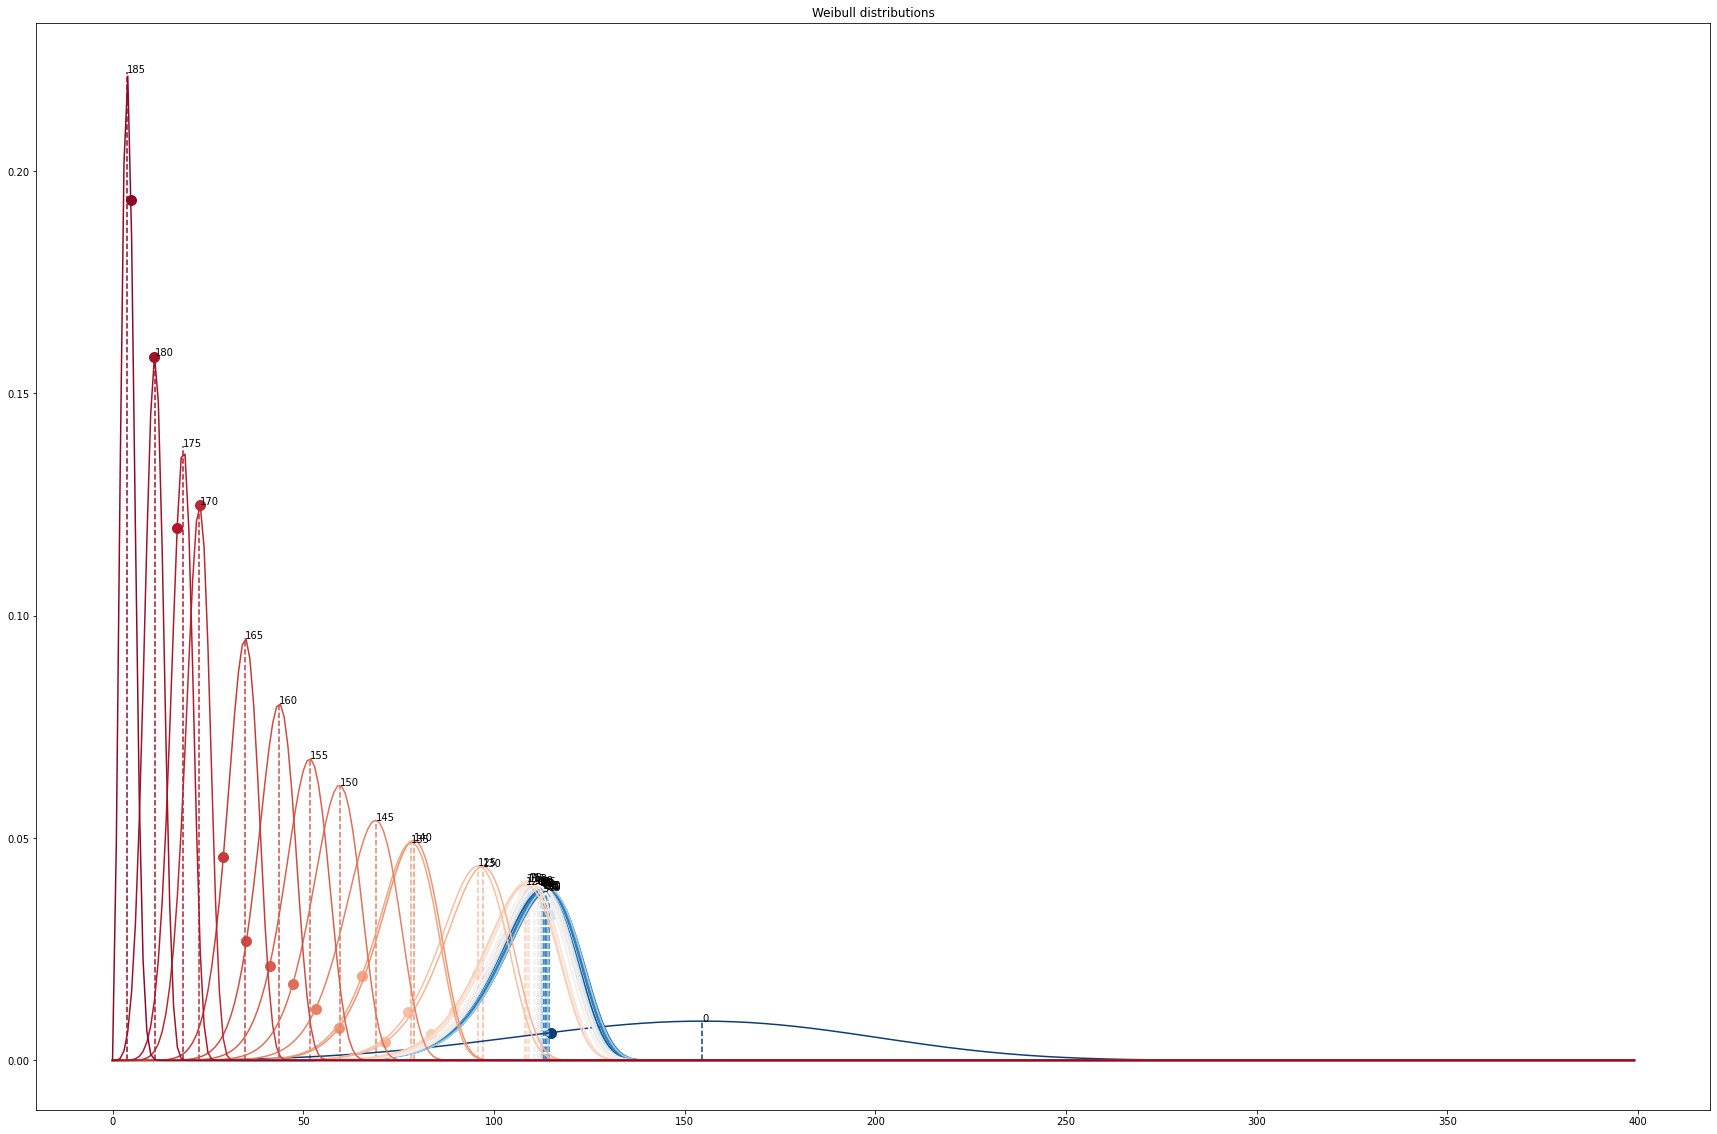

In [201]:
plot_weibull_predictions(s)

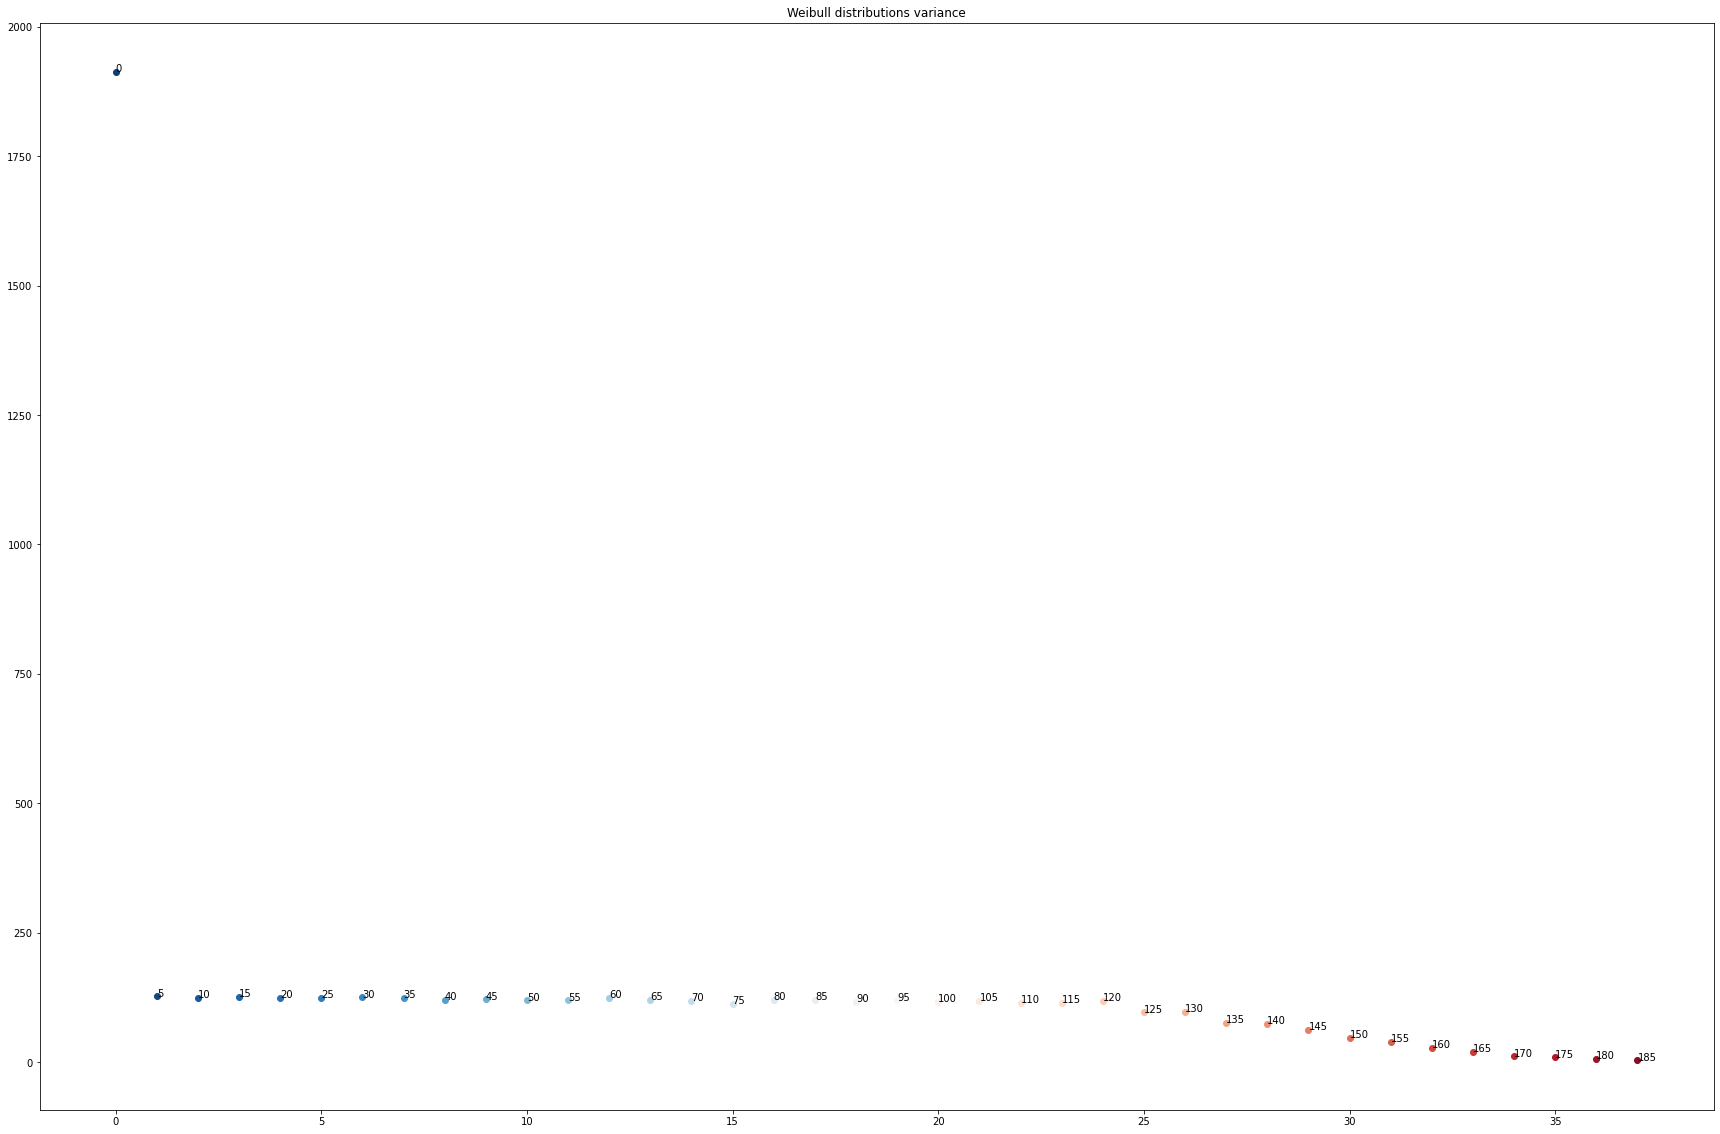

In [202]:
plot_weibull_variance(s)

In [115]:
a = np.array([[1,2,3,4],[5,6,7,8], [9,10,11,12]])

In [121]:
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [125]:
np.mean(a[:,2:], axis=1)

array([ 3.5,  7.5, 11.5])

In [ ]:
net_cfg = {"num_rec": 2, "max_time": 25, "neuron_0": 74, "neuron_1": 71, "neuron_2": 78, "neuron_3": 68,
     "activation_0": "tanh", "activation_1": "sigmoid", "activation_2": "sigmoid", "activation_3": "tanh",
      "dropout_0": 0.04198965650706104, "dropout_1": 0.6518949855946009, "dropout_2": 0.5134433415117658,
       "dropout_3": 0.44181882048621723, "recurrent_dropout_0": 0.011379281378212352, "recurrent_dropout_1": 0.07877843876273939,
        "recurrent_dropout_2": 0.25685072170110057, "recurrent_dropout_3": 0.16640448683710898, "final_activation_0": "softplus",
         "final_activation_1": "softplus", "percentage": 63, "rul": 125, "rul_style": "nonlinear", "lr": 0.021745779733326226, "batch": "256"}

In [ ]:
id_col = 'unit_number'
time_col = 'time'
max_time = 32
mask_value = -99

feature_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + ['sensor_measurement_{}'.format(x) for x in
                                                                    range(1, 22)]
column_names = [id_col, time_col] + feature_cols
test_or = test_x_orig.copy()
test_or = np.concatenate([test_or[['unit_number', 'time']], scaler.transform(test_or[feature_cols])], axis=1)


# Preparing data for the RNN (numpy arrays)
test_or, _ = build_data(units=test_or[:, 0], time=test_or[:, 1], x=test_or[:, 2:], max_time=net_cfg['max_time'],
                                is_test=True, mask_value=-99,
                                original_data=np.repeat(200, test_or.shape[0]), net_cfg = net_cfg, label=net_cfg['rul_style'])


In [ ]:
reps = 30
test_predict_1_or = []
test_predict_2_or = []
for _ in range(reps):
    test_predict_or = model(test_or, training=True).numpy()
#     print(test_predict_or.shape)
#     break
    test_predict_1_or.append(test_predict_or[:,0].reshape(test_predict_or[:,0].shape[0], 1))
    test_predict_2_or.append(test_predict_or[:,1].reshape(test_predict_or[:,1].shape[0], 1))

test_predict_1_mean_or = np.average(np.hstack(test_predict_1_or), axis=1)
test_predict_2_mean_or = np.average(np.hstack(test_predict_2_or), axis=1)
test_predict_1_mean_or = test_predict_1_mean_or.reshape(test_predict_1_mean_or.shape[0],1)
test_predict_2_mean_or = test_predict_2_mean_or.reshape(test_predict_2_mean_or.shape[0],1)
test_predict_1_std_or = np.std(np.hstack(test_predict_1_or), axis=1)
test_predict_2_std_or = np.std(np.hstack(test_predict_2_or), axis=1)
test_predict_1_std_or = test_predict_1_std_or.reshape(test_predict_1_std_or.shape[0],1)
test_predict_2_std_or = test_predict_2_std_or.reshape(test_predict_2_std_or.shape[0],1)


test_predict_or = np.hstack([test_predict_1_mean_or, test_predict_2_mean_or, 
                           test_predict_1_std_or, test_predict_2_std_or])    

test_predict_or = np.resize(test_predict_or, (test_or.shape[0], 4))  # changed from 2 to 4
test_result_or = np.concatenate((test_y_orig, test_predict_or), axis=1)
test_results_df_or = pd.DataFrame(test_result_or, columns=['T',   'mean_alpha', 'mean_beta', 'std_alpha', 'std_beta']) # (add 'E' for event)
#     test_results_df['unit_number'] = train_x_orig.iloc[test_index]['unit_number'].to_numpy() # Note the train_x_orig
#     test_results_df['time'] = train_x_orig.iloc[test_index]['time'].to_numpy()

test_results_df_or['predicted_mu'] = test_results_df_or[['mean_alpha', 'mean_beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
test_results_df_or['predicted_std+'] = test_results_df_or[['mean_alpha', 'mean_beta', 'std_alpha', 
                                                       'std_beta']].apply(lambda row: weibull_mean(row[0]+1.96*row[2]/np.sqrt(reps), 
                                                                                                   row[1]+1.96*row[3]/np.sqrt(reps)), axis=1)
test_results_df_or['predicted_std-'] = test_results_df_or[['mean_alpha', 'mean_beta', 'std_alpha', 
                                                           'std_beta']].apply(lambda row: weibull_mean(row[0]-1.96*row[2]/np.sqrt(reps),
                                                                                                       row[1]-1.96*row[3]/np.sqrt(reps)), axis=1)




# Old way
# test_predict_or = model(test_or, training=True).numpy()  # equivalent to model.predict(test_or) but with training=False
# test_predict_or = np.resize(test_predict_or, (test_or.shape[0], 2))
# test_result_or = np.concatenate((test_y_orig, test_predict_or), axis=1)
# test_results_df_or = pd.DataFrame(test_result_or, columns=['T', 'alpha', 'beta'])
# test_results_df_or['unit_number'] = np.arange(1, test_results_df_or.shape[0]+1)

# test_results_df_or['predicted_mu'] = test_results_df_or[['alpha', 'beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)

In [ ]:
test_results_df_or

In [ ]:
#1 - 10 epochs
np.sqrt(mean_squared_error(test_results_df_or['predicted_mu'], test_results_df_or['T']))

In [ ]:
#1 - 50 epochs
np.sqrt(mean_squared_error(test_results_df_or['predicted_mu'], test_results_df_or['T']))

In [ ]:
#2 - 21/50 epochs
np.sqrt(mean_squared_error(test_results_df_or['predicted_mu'], test_results_df_or['T']))

In [ ]:
for unit_number, grp in train_results_df.groupby('unit_number'):
    plot_weibull_predictions(grp, unit_number)
    break

In [ ]:
for unit_number, grp in test_results_df.groupby('unit_number'):
    plot_weibull_predictions(grp, unit_number)
    break

# Training full model on the best HP

In [18]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  # uncomment in case running ONLY on CPU is required

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras import backend as k
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import History
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

from activations import Activate
from losses import CustomLoss
from preprocessing import build_data

import numpy as np
import pandas as pd
import math
from datetime import datetime

from sklearn import pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib as mpl

import json

2022-03-16 15:30:25.729020: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [19]:
# net_cfg = {"num_rec": 2, "max_time": 30, "neuron_0": 84, "neuron_1": 38, "neuron_2": 52, "activation_rec_0": "sigmoid", "activation_rec_1": "tanh",
#  "activation_rec_2": "tanh", "rec_dropout_norm_0": 0.24029640530008275, "rec_dropout_norm_1": 0.47268487647610613, "rec_dropout_norm_2": 0.29820352354933377,
#   "recurrent_dropout_0": 0.012285165175023748, "recurrent_dropout_1": 0.3293396516199814, "recurrent_dropout_2": 0.2121952809065241, "final_activation_0": "softplus",
#    "final_activation_1": "softplus", "percentage": 62, "rul": 113, "rul_style": "nonlinear", "lr": "1e-4", "batch": "64", "num_den": 2, "neuron_den_0": 71, "neuron_den_1": 27,
#     "neuron_den_2": 68, "activation_den_0": "sigmoid", "activation_den_1": "sigmoid", "activation_den_2": "sigmoid", "dropout_0": 0.18207609281622392, "dropout_1": 0.5925208723880789,
#      "dropout_2": 0.5323343040227004}


# net_cfg = {"num_rec": 2, "max_time": 38, "neuron_0": 77, "neuron_1": 70, "neuron_2": 55, "activation_rec_0": "sigmoid", "activation_rec_1": "sigmoid", 
# "activation_rec_2": "tanh", "rec_dropout_norm_0": 0.3177351876905285, "rec_dropout_norm_1": 0.45196554798903477, "rec_dropout_norm_2": 0.4286236987021706,
#  "recurrent_dropout_0": 0.19410876092302315, "recurrent_dropout_1": 0.36895090149950466, "recurrent_dropout_2": 0.7273328867687492, "final_activation_0": "softplus",
#   "final_activation_1": "softplus", "percentage": 62, "rul": 120, "rul_style": "nonlinear", "lr": "1e-4", "batch": "64", "num_den": 1, "neuron_den_0": 55,
#    "neuron_den_1": 69, "neuron_den_2": 36, "activation_den_0": "sigmoid", "activation_den_1": "tanh", "activation_den_2": "tanh", "dropout_0": 0.3282860986299452,
#     "dropout_1": 0.5304125564260277, "dropout_2": 0.44193327772555363}

# net_cfg = {"num_rec": 1, "max_time": 24, "neuron_0": 72, "neuron_1": 51, "neuron_2": 29, "activation_rec_0": "sigmoid", "activation_rec_1": "tanh", "activation_rec_2": "tanh",
#  "rec_dropout_norm_0": 0.4407875692641039, "rec_dropout_norm_1": 0.43575168032622935, "rec_dropout_norm_2": 0.3629528719448834, "recurrent_dropout_0": 0.6355127476844804,
#   "recurrent_dropout_1": 0.5386770449797325, "recurrent_dropout_2": 0.19673873867440625, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 63,
#    "rul": 115, "rul_style": "nonlinear", "lr": "1e-4", "batch": "64", "num_den": 1, "neuron_den_0": 30, "neuron_den_1": 79, "neuron_den_2": 89, "activation_den_0": "tanh",
#     "activation_den_1": "sigmoid", "activation_den_2": "tanh", "dropout_0": 0.6744029905927204, "dropout_1": 0.527642634176199, "dropout_2": 0.6315631501088959}

net_cfg = {"num_rec": 1, "max_time": 30, "neuron_0": 68, "neuron_1": 37, "neuron_2": 18, "activation_rec_0": "sigmoid", "activation_rec_1": "tanh", "activation_rec_2": "tanh",
 "rec_dropout_norm_0": 0.4942981994641567, "rec_dropout_norm_1": 0.5478254027816822, "rec_dropout_norm_2": 0.5489831334674996, "recurrent_dropout_0": 0.4935357365226958, "recurrent_dropout_1":
  0.39090153545728334, "recurrent_dropout_2": 0.5679455358285939, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 64, "rul": 119, "rul_style": "nonlinear",
   "lr": "1e-4", "batch": "64", "num_den": 1, "neuron_den_0": 90, "neuron_den_1": 44, "neuron_den_2": 29, "activation_den_0": "sigmoid", "activation_den_1": "sigmoid", "activation_den_2": "sigmoid",
    "dropout_0": 0.007929647142163118, "dropout_1": 0.5602915921989118, "dropout_2": 0.5481912138018726}

net_cfg = {"num_rec": 1, "max_time": 38, "neuron_0": 49, "neuron_1": 25, "neuron_2": 89, "activation_rec_0": "sigmoid", "activation_rec_1": "tanh", "activation_rec_2": "sigmoid",
 "rec_dropout_norm_0": 0.43733610344927026, "rec_dropout_norm_1": 0.5264641431370682, "rec_dropout_norm_2": 0.39651681655854976, "recurrent_dropout_0": 0.6246405485246954,
  "recurrent_dropout_1": 0.35541873905868654, "recurrent_dropout_2": 0.5826687367719754, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 40,
   "rul": 118, "rul_style": "nonlinear", "lr": "1e-4", "batch": "64", "num_den": 1, "neuron_den_0": 52, "neuron_den_1": 41, "neuron_den_2": 55, "activation_den_0": "tanh",
    "activation_den_1": "sigmoid", "activation_den_2": "tanh", "dropout_0": 0.15695483248610206, "dropout_1": 0.4514125634405938, "dropout_2": 0.6310550702551022}

# net_cfg = {"num_rec": 2, "max_time": 38, "neuron_0": 37, "neuron_1": 85, "neuron_2": 91, "activation_rec_0": "sigmoid", "activation_rec_1": "tanh", "activation_rec_2": "tanh",
#  "rec_dropout_norm_0": 0.30586354816643496, "rec_dropout_norm_1": 0.43326052138959403, "rec_dropout_norm_2": 0.4340680426329027, "recurrent_dropout_0": 0.04224732314001774,
#   "recurrent_dropout_1": 0.23983319226914582, "recurrent_dropout_2": 0.3422554106032656, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 51,
#    "rul": 120, "rul_style": "nonlinear", "lr": "1e-4", "batch": "128", "num_den": 1, "neuron_den_0": 48, "neuron_den_1": 78, "neuron_den_2": 71, "activation_den_0": "sigmoid",
#     "activation_den_1": "sigmoid", "activation_den_2": "sigmoid", "dropout_0": 0.15773777560280175, "dropout_1": 0.6550375969443017, "dropout_2": 0.17604505320610556}


# net_cfg = {"num_rec": 2, "max_time": 24, "neuron_0": 79, "neuron_1": 44, "neuron_2": 99, "activation_rec_0": "sigmoid", "activation_rec_1": "tanh", 
# "activation_rec_2": "sigmoid", "rec_dropout_norm_0": 0.4244238539332571, "rec_dropout_norm_1": 0.37066270432340026, "rec_dropout_norm_2": 0.31398795120603035,
#  "recurrent_dropout_0": 0.849653965124555, "recurrent_dropout_1": 0.03549373596354163, "recurrent_dropout_2": 0.6350205995123944, "final_activation_0": "softplus",
#   "final_activation_1": "softplus", "percentage": 25, "rul": 127, "rul_style": "nonlinear", "lr": "1e-1", "batch": "32", "num_den": 1, "neuron_den_0": 79,
#    "neuron_den_1": 44, "neuron_den_2": 95, "activation_den_0": "tanh", "activation_den_1": "sigmoid", "activation_den_2": "sigmoid", "dropout_0": 0.34113062332592553,
#     "dropout_1": 0.8761119164046561, "dropout_2": 0.3031630832699744}

In [20]:
cfg = {'cv': 10, 'shuffle': True,
'random_state': 21,
'mask_value': -99,
'reps': 30,
'epochs': 20,
'batches': 64}

In [21]:
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)

In [22]:
def network(train_X, train_y, net_cfg, cfg):
    k.set_epsilon(1e-10)
    strategy = tf.distribute.MirroredStrategy()

    history = History()
    nan_terminator = callbacks.TerminateOnNaN()
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss')
    early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5)
    # checkpoint_filepath = './saved_models/cp-{epoch:04d}.ckpt'
    # checkpoint = callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='loss', verbose=1)
    # logdir="logs/test1" #+ datetime.now().strftime("%Y%m%d-%H%M%S")
    # tensorboard = callbacks.TensorBoard(log_dir=logdir)

    window = train_X.shape[1]
    n_features = train_X.shape[2]

    with strategy.scope():  # Create a MirroredStrategy.

        inputs = keras.Input(shape=(window, n_features))
        masking_layer = keras.layers.Masking(mask_value=cfg['mask_value'])(inputs)

        # recurrent layers
        last = 0
        if net_cfg["num_rec"] > 1:
            for i in np.arange(net_cfg["num_rec"] - 1):
                masking_layer = keras.layers.GRU(
                    net_cfg["neuron_" + str(i)],
                    activation=net_cfg["activation_rec_" + str(i)],
                    dropout=net_cfg["rec_dropout_norm_" + str(i)],
                    recurrent_dropout=net_cfg["recurrent_dropout_" + str(i)],
                    return_sequences=True,
                )(masking_layer)
            last = i + 1
            
        gru_last = keras.layers.GRU(
        net_cfg["neuron_" + str(last)],
        activation=net_cfg["activation_rec_" + str(last)],
        dropout=net_cfg["rec_dropout_norm_" + str(last)],
        recurrent_dropout=net_cfg["recurrent_dropout_" + str(last)],
        return_sequences=False,
        )(masking_layer)

        # dense layers
        last = 0
        if net_cfg["num_den"] > 1:
            for i in np.arange(net_cfg["num_den"] - 1):
                gru_last = keras.layers.Dense(
                net_cfg["neuron_den_" + str(i)],
                activation=net_cfg["activation_den_" + str(i)],
                )(gru_last)
                gru_last = keras.layers.Dropout(
                    rate=net_cfg["dropout_" + str(i)],
                )(gru_last)
            last = i + 1
     
        dense_ = keras.layers.Dense(2)(gru_last)
        custom_activation = Activate(net_cfg=net_cfg)
        outputs = keras.layers.Activation(custom_activation)(dense_)

        model = keras.Model(inputs=inputs, outputs=outputs, name="weibull_params")

        # rmse = tf.keras.metrics.RootMeanSquaredError()
        model.compile(loss=CustomLoss(kind='continuous', reduce_loss=True), optimizer=Adam(lr=eval(net_cfg['lr']),
                                                                                        clipvalue=0.5))
    model.summary()  # uncomment for debugging

    batch_size=eval(net_cfg['batch'])
    model.fit(train_X, train_y,
              epochs=cfg['epochs'],
              batch_size=eval(net_cfg['batch']),
              verbose=1,
              callbacks=[nan_terminator, history, reduce_lr, early_stopping],  #, checkpoint, tensorboard], 
              workers=32)

    return model, history



In [23]:
def load_data():

    np.random.seed(42)

    id_col = 'unit_number'
    time_col = 'time'
    feature_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + ['sensor_measurement_{}'.format(x) for x in
                                                                       range(1, 22)]
    column_names = [id_col, time_col] + feature_cols

    train_x_orig = pd.read_csv('./DataSets/CMAPSS/train_FD001.csv', header=None, sep='\s+', decimal=".")
    train_x_orig.columns = column_names

    test_x_orig = pd.read_csv('./DataSets/CMAPSS/test_FD001.csv', header=None, sep='\s+', decimal=".")
    test_x_orig.columns = column_names

    test_y_orig = pd.read_csv('./DataSets/CMAPSS/RUL_FD001.csv', header=None, names=['T'])

    # Make engine numbers and days zero-indexed
    train_x_orig.iloc[:, 0:2] -= 1
    test_x_orig.iloc[:, 0:2] -= 1

    # Pre-processing data
    scaler = pipeline.Pipeline(steps=[
        ('minmax', MinMaxScaler(feature_range=(-1, 1))),
        ('remove_constant', VarianceThreshold())])

    train = train_x_orig.copy()
    train = np.concatenate([train[['unit_number', 'time']], scaler.fit_transform(train[feature_cols])], axis=1)

    train_x, train_y = build_data(units=train[:, 0], time=train[:, 1], x=train[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=False, mask_value=cfg['mask_value'],
                                    original_data=None, net_cfg = net_cfg, label=net_cfg['rul_style'])

    test_or = test_x_orig.copy()
    test_or = np.concatenate([test_or[['unit_number', 'time']], scaler.transform(test_or[feature_cols])], axis=1)


    # Preparing data for the RNN (numpy arrays)
    test_or, _ = build_data(units=test_or[:, 0], time=test_or[:, 1], x=test_or[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=True, mask_value=-99,
                                    original_data=np.repeat(200, test_or.shape[0]), net_cfg = net_cfg, label=net_cfg['rul_style'])

    

    return train_x, train_y, test_or, test_y_orig, train_x_orig


In [24]:
train_x, train_y, test_x, test_y, train_x_orig = load_data()


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 12752.13it/s]


In [25]:
print('train_x', train_x.shape, 'train_y', train_y.shape, 'test_x', test_x.shape, 'test_y', test_y.shape)


train_x (20631, 38, 17) train_y (20631, 1) test_x (100, 38, 17) test_y (100, 1)


In [26]:
# k.clear_session()
# try:
#     del model
# except:
#     pass

# model3, history = network(train_x, train_y, net_cfg, cfg)

In [27]:
model = tf.keras.models.load_model('GRU/Final_experiments/dataset_1/267/saved_models_4_1/cp-0100.ckpt', custom_objects={"CustomLoss": CustomLoss, "Activate": Activate})

2022-03-16 15:30:33.087801: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-03-16 15:30:33.448492: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-16 15:30:33.448524: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: neocortex
2022-03-16 15:30:33.448531: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: neocortex
2022-03-16 15:30:33.448618: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.42.1
2022-03-16 15:30:33.448641: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.42.1
2022-03-16 15:30:33.448645: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.42.1
2022-03-16 15:30:33.449138: I tensorflow/core/platform/cpu_featu

In [28]:
model.summary()

Model: "weibull_params"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 38, 17)]          0         
_________________________________________________________________
masking (Masking)            (None, 38, 17)            0         
_________________________________________________________________
gru (GRU)                    (None, 49)                9996      
_________________________________________________________________
dense (Dense)                (None, 2)                 100       
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
Total params: 10,096
Trainable params: 10,096
Non-trainable params: 0
_________________________________________________________________


In [29]:
reps = 30
test_predict_1 = []
test_predict_2 = []
for i in range(cfg["reps"]):
    tf.random.set_seed(i)
    test_predict = model(test_x, training=True).numpy()
    test_predict_1.append(
        test_predict[:, 0].reshape(test_predict[:, 0].shape[0], 1)
    )
    test_predict_2.append(
        test_predict[:, 1].reshape(test_predict[:, 1].shape[0], 1)
    )

test_predict_1_median = np.median(np.hstack(test_predict_1), axis=1)
test_predict_2_median = np.median(np.hstack(test_predict_2), axis=1)
test_predict_1_median = test_predict_1_median.reshape(
    test_predict_1_median.shape[0], 1
)
test_predict_2_median = test_predict_2_median.reshape(
    test_predict_2_median.shape[0], 1
)
test_predict_1_std = np.std(np.hstack(test_predict_1), axis=1)
test_predict_2_std = np.std(np.hstack(test_predict_2), axis=1)
test_predict_1_std = test_predict_1_std.reshape(test_predict_1_std.shape[0], 1)
test_predict_2_std = test_predict_2_std.reshape(test_predict_2_std.shape[0], 1)

test_predict = np.hstack(
    [
        test_predict_1_median,
        test_predict_2_median,
        test_predict_1_std,
        test_predict_2_std,
    ]
)

test_predict = np.resize(
    test_predict, (test_x.shape[0], 4)
)  # changed from 2 to 4
test_result = np.concatenate((test_y, test_predict), axis=1)
test_results_df = pd.DataFrame(
    test_result,
    columns=["T", "median_alpha", "median_beta", "std_alpha", "std_beta"],
)

test_results_df["predicted_mu"] = test_results_df[
    ["median_alpha", "median_beta"]
].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
test_results_df["uncertainty"] = np.mean(test_predict[:, 2:], axis=1)

In [30]:
train_predict_1 = []
train_predict_2 = []

success = True

for i in range(cfg["reps"]):
    tf.random.set_seed(i)
    train_predict = model(train_x, training=True).numpy()
    train_predict_1.append(
        train_predict[:, 0].reshape(train_predict[:, 0].shape[0], 1)
    )
    train_predict_2.append(
        train_predict[:, 1].reshape(train_predict[:, 1].shape[0], 1)
    )

train_predict_1_median = np.median(np.hstack(train_predict_1), axis=1)
train_predict_2_median = np.median(np.hstack(train_predict_2), axis=1)
train_predict_1_median = train_predict_1_median.reshape(
    train_predict_1_median.shape[0], 1
)
train_predict_2_median = train_predict_2_median.reshape(
    train_predict_2_median.shape[0], 1
)
train_predict_1_std = np.std(np.hstack(train_predict_1), axis=1)
train_predict_2_std = np.std(np.hstack(train_predict_2), axis=1)
train_predict_1_std = train_predict_1_std.reshape(
    train_predict_1_std.shape[0], 1
)
train_predict_2_std = train_predict_2_std.reshape(
    train_predict_2_std.shape[0], 1
)

train_predict = np.hstack(
    [
        train_predict_1_median,
        train_predict_2_median,
        train_predict_1_std,
        train_predict_2_std,
    ]
)

train_predict = np.resize(train_predict, (train_x.shape[0], 4))
train_result = np.concatenate((train_y, train_predict), axis=1)
train_results_df = pd.DataFrame(
    train_result,
    columns=["T", "median_alpha", "median_beta", "std_alpha", "std_beta"],
)
train_results_df["unit_number"] = train_x_orig["unit_number"].to_numpy()
train_results_df["time"] = train_x_orig["time"].to_numpy()

train_results_df["predicted_mu"] = train_results_df[
    ["median_alpha", "median_beta"]
].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
train_results_df["uncertainty"] = np.mean(train_predict[:, 2:], axis=1)

In [34]:
columns = [
        "rmse_train",
        "mae_train",
        "r2_train",
        "uncertainty_train",
        "rmse_test",
        "mae_test",
        "r2_test",
        "uncertainty_test",
        "net_cfg",
    ]
results = pd.DataFrame(columns=columns)

rmse_train = []
r2_train = []
mae_train = []
std_train = []

rmse_test = []
r2_test = []
mae_test = []
std_test = []

In [17]:
# Performance evaluation
# train:
rmse_train.append(
    np.sqrt(
        mean_squared_error(
            train_results_df["predicted_mu"], train_results_df["T"]
        )
    )
)
mae_train.append(
    (
        mean_absolute_error(
            train_results_df["predicted_mu"], train_results_df["T"]
        )
    )
)
r2_train.append(
    r2_score(train_results_df["predicted_mu"], train_results_df["T"])
)
std_train.append(train_results_df["uncertainty"].mean())

# test:
rmse_test.append(
    np.sqrt(
        mean_squared_error(
            test_results_df["predicted_mu"], test_results_df["T"]
        )
    )
)
mae_test.append(
    (mean_absolute_error(test_results_df["predicted_mu"], test_results_df["T"]))
)
r2_test.append(r2_score(test_results_df["predicted_mu"], test_results_df["T"]))
std_test.append(test_results_df["uncertainty"].mean())

# registering results
results["rmse_train"] = rmse_train
results["mae_train"] = mae_train
results["r2_train"] = r2_train
results["uncertainty_train"] = std_train
results["rmse_test"] = rmse_test
results["mae_test"] = mae_test
results["r2_test"] = r2_test
results["uncertainty_test"] = std_test
results["net_cfg"] = json.dumps(net_cfg)

In [18]:
# Results=pd.concat([results187,results263, results101,results290,results267,results165])
# Results.to_csv('Final_experiments/dataset_1/Results', index=False)

In [19]:
results

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,18.134973,11.796759,0.748646,10.089643,20.620101,15.766266,0.694388,11.113087,"{""num_rec"": 1, ""max_time"": 38, ""neuron_0"": 49,..."


In [72]:
Results = pd.read_csv('GRU/Final_experiments/dataset_1/Results')

In [74]:
Results

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,7.089823,4.827719,0.951141,6.086137,20.734014,16.911902,0.635591,6.347113,"{""num_rec"": 2, ""max_time"": 30, ""neuron_0"": 84,..."
1,7.625503,4.684950,0.949609,6.977883,24.847671,20.523445,0.543277,8.512672,"{""num_rec"": 2, ""max_time"": 38, ""neuron_0"": 77,..."
2,12.279424,7.842011,0.841450,4.916361,26.824422,21.366423,0.314110,5.687934,"{""num_rec"": 1, ""max_time"": 24, ""neuron_0"": 72,..."
3,12.530787,7.848395,0.845866,4.207865,29.815131,23.915410,0.174613,4.906784,"{""num_rec"": 1, ""max_time"": 30, ""neuron_0"": 68,..."
4,18.283595,13.910402,0.711747,4.371925,20.790263,15.474533,0.636539,4.883142,"{""num_rec"": 1, ""max_time"": 38, ""neuron_0"": 49,..."
5,14.850582,10.765737,0.804497,6.377253,23.777367,18.717816,0.526813,7.591391,"{""num_rec"": 2, ""max_time"": 38, ""neuron_0"": 37,..."
6,25.633999,20.809390,0.415993,7.046897,23.775796,18.297404,0.524526,7.838632,"{""num_rec"": 2, ""max_time"": 24, ""neuron_0"": 79,..."


In [75]:
pareto_configs.reset_index(drop=True, inplace=True)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

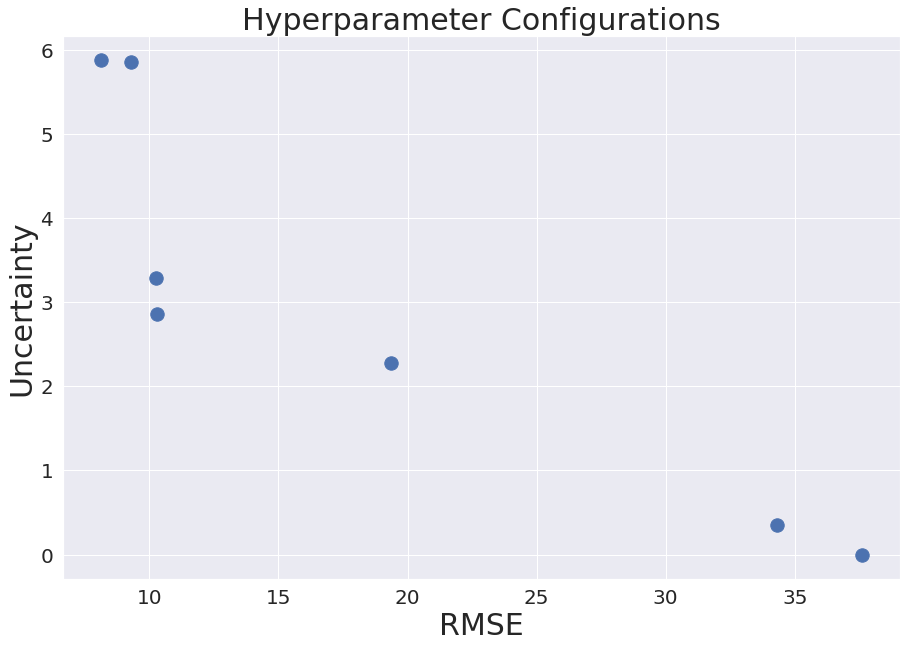

In [76]:
x = pareto_configs['rmse_test'].values
y = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
# plt.scatter(x[0], y[0], s=400, facecolors='red')
plt.scatter(x, y, s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configurations', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.savefig('./paper_figures/cmapss_1.pdf', format='pdf')


# for i, txt in enumerate(pareto_configs.index):
#     plt.annotate(txt, (x[i], y[i]))

In [77]:
Results

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,7.089823,4.827719,0.951141,6.086137,20.734014,16.911902,0.635591,6.347113,"{""num_rec"": 2, ""max_time"": 30, ""neuron_0"": 84,..."
1,7.625503,4.684950,0.949609,6.977883,24.847671,20.523445,0.543277,8.512672,"{""num_rec"": 2, ""max_time"": 38, ""neuron_0"": 77,..."
2,12.279424,7.842011,0.841450,4.916361,26.824422,21.366423,0.314110,5.687934,"{""num_rec"": 1, ""max_time"": 24, ""neuron_0"": 72,..."
3,12.530787,7.848395,0.845866,4.207865,29.815131,23.915410,0.174613,4.906784,"{""num_rec"": 1, ""max_time"": 30, ""neuron_0"": 68,..."
4,18.283595,13.910402,0.711747,4.371925,20.790263,15.474533,0.636539,4.883142,"{""num_rec"": 1, ""max_time"": 38, ""neuron_0"": 49,..."
5,14.850582,10.765737,0.804497,6.377253,23.777367,18.717816,0.526813,7.591391,"{""num_rec"": 2, ""max_time"": 38, ""neuron_0"": 37,..."
6,25.633999,20.809390,0.415993,7.046897,23.775796,18.297404,0.524526,7.838632,"{""num_rec"": 2, ""max_time"": 24, ""neuron_0"": 79,..."


In [78]:
Results['rank'] = pareto_configs.index

In [79]:
Results

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg,rank
0,7.089823,4.827719,0.951141,6.086137,20.734014,16.911902,0.635591,6.347113,"{""num_rec"": 2, ""max_time"": 30, ""neuron_0"": 84,...",0
1,7.625503,4.684950,0.949609,6.977883,24.847671,20.523445,0.543277,8.512672,"{""num_rec"": 2, ""max_time"": 38, ""neuron_0"": 77,...",1
2,12.279424,7.842011,0.841450,4.916361,26.824422,21.366423,0.314110,5.687934,"{""num_rec"": 1, ""max_time"": 24, ""neuron_0"": 72,...",2
3,12.530787,7.848395,0.845866,4.207865,29.815131,23.915410,0.174613,4.906784,"{""num_rec"": 1, ""max_time"": 30, ""neuron_0"": 68,...",3
4,18.283595,13.910402,0.711747,4.371925,20.790263,15.474533,0.636539,4.883142,"{""num_rec"": 1, ""max_time"": 38, ""neuron_0"": 49,...",4
5,14.850582,10.765737,0.804497,6.377253,23.777367,18.717816,0.526813,7.591391,"{""num_rec"": 2, ""max_time"": 38, ""neuron_0"": 37,...",5
6,25.633999,20.809390,0.415993,7.046897,23.775796,18.297404,0.524526,7.838632,"{""num_rec"": 2, ""max_time"": 24, ""neuron_0"": 79,...",6


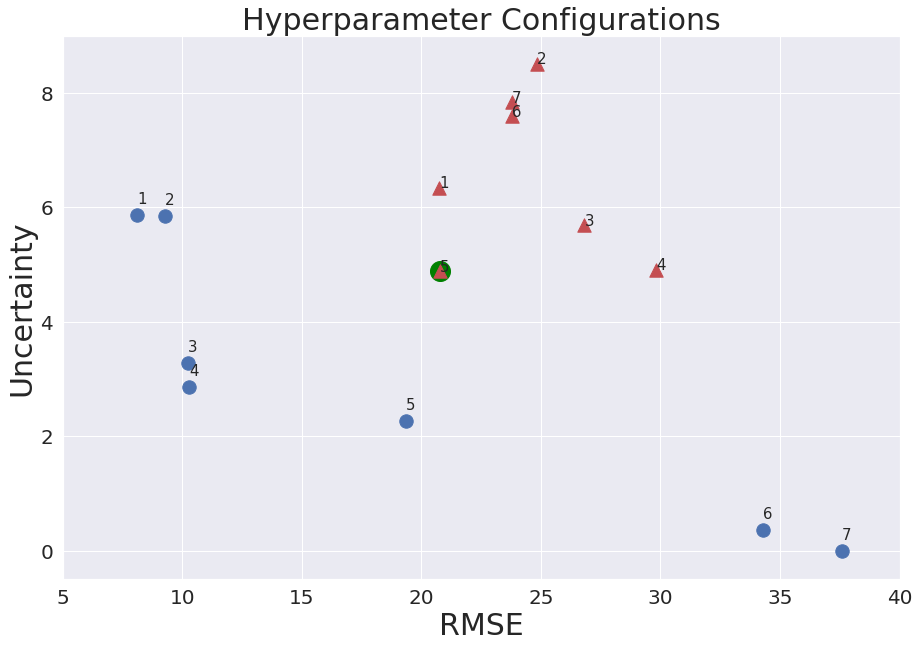

In [81]:
x = Results['rmse_test'].values
y = Results['uncertainty_test'].values
x_prime = pareto_configs['rmse_test'].values
y_prime = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
plt.scatter(x[4], y[4], s=400, facecolors='green')
plt.scatter(x, y, marker='^',s=180, c='r')
plt.scatter(x_prime, y_prime,s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configurations', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(5,40)
plt.ylim(-0.5,9)

for i, txt in enumerate(Results['rank']):
    plt.annotate(txt+1, (x[i], y[i]), fontsize=15)

for i, txt in enumerate(pareto_configs.index):
    plt.annotate(txt+1, (x_prime[i], y_prime[i]+0.2), fontsize=15)

plt.savefig('./paper_figures/cmapss_1_obj_space_annotated.pdf', format='pdf')


***

### Plots

In [32]:
def surv(alpha, beta, t):
    return np.exp(-np.power(t/alpha, beta))

In [33]:
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)

In [34]:
def weibull_pdf(alpha, beta, t):
    return (beta/alpha) * (t/alpha)**(beta-1)*np.exp(- (t/alpha)**beta)

In [35]:
def weibull_median(alpha, beta):
    return alpha*(-np.log(.5))**(1/beta)

In [36]:
def weibull_mode(alpha, beta):
    # assert np.all(beta > 1)
    return alpha * ((beta-1)/beta)**(1/beta)

In [37]:
def weibull_variance(alpha, beta):
    var = alpha**2*(math.gamma(1+2/beta)-math.gamma(1+1/beta)**2)
    return var

In [68]:
def plot_weibull_variance(results_df):

    plt.figure(figsize=(30,20))
    palette = sns.color_palette("RdBu_r", results_df.shape[0] + 1)
    color_dict = dict(enumerate(palette))

    for i, row in enumerate(results_df.iterrows()):
            alpha=row[1]['mean_alpha']
            beta = row[1]['mean_beta']
            color = color_dict[i]
            variance = weibull_variance(alpha, beta)

            plt.scatter(i, variance, color=color)
            plt.text(i, variance+0.5, i*5)
            plt.title('Weibull distributions variance')
            # plt.legend()


In [69]:
def plot_weibull_predictions(results_df, u):

    fig, ax = plt.subplots(figsize=(30,20))

    t=np.arange(0,150)

    # palette = sns.color_palette("RdBu", results_df.shape[0] + 1)  # "RdBu_r"
    # color_dict = dict(enumerate(palette))
    c = np.arange(1, results_df.shape[0] + 1)
    palette = mpl.cm.get_cmap('RdBu_r', results_df.shape[0])
    dummie_cax = ax.scatter(c, c, c=c, cmap=palette)
    ax.cla()

    for i, row in enumerate(results_df.iterrows()):
        #     print(i)
        #     print(row[1])
            alpha=row[1]['median_alpha']
            beta = row[1]['median_beta']
            # T = row[1]['T']
            # label = 'a={} b={}'.format(alpha, beta)
            # color = color_dict[i]
            # mode = weibull_mode(alpha, beta)
            # mean = weibull_mean(alpha, beta)
            # y_max = weibull_pdf(alpha, beta, mode)    

            pos = ax.plot(t, weibull_pdf(alpha, beta, t), c=palette(i), linewidth=2)  # label=label
            # plt.axvline(mean, color='r', linestyle='--')

            ax.set_title('Evolution of RUL distributions (unit='+str(u+1)+')', fontsize=60)
            ax.set_xlabel('Time to Failure', fontsize=60)
            ax.set_xlim(150,0)
            ax.set_ylabel('Probability of Failure', fontsize=60)
            ax.tick_params(labelsize=50)
            # ax.set_xticks(fontsize=50)
            # plt.yticks(fontsize=50)
    cbar = fig.colorbar(dummie_cax)
    # cbar.set_ticks([])
    cbar.ax.tick_params(labelsize=50)
    

    # plt.savefig('./paper_figures/cmapss_1_WB.pdf', format='pdf')
    plt.show()


In [70]:
u = 1
s = train_results_df[train_results_df.unit_number==u].iloc[::5]
s.shape

(58, 9)

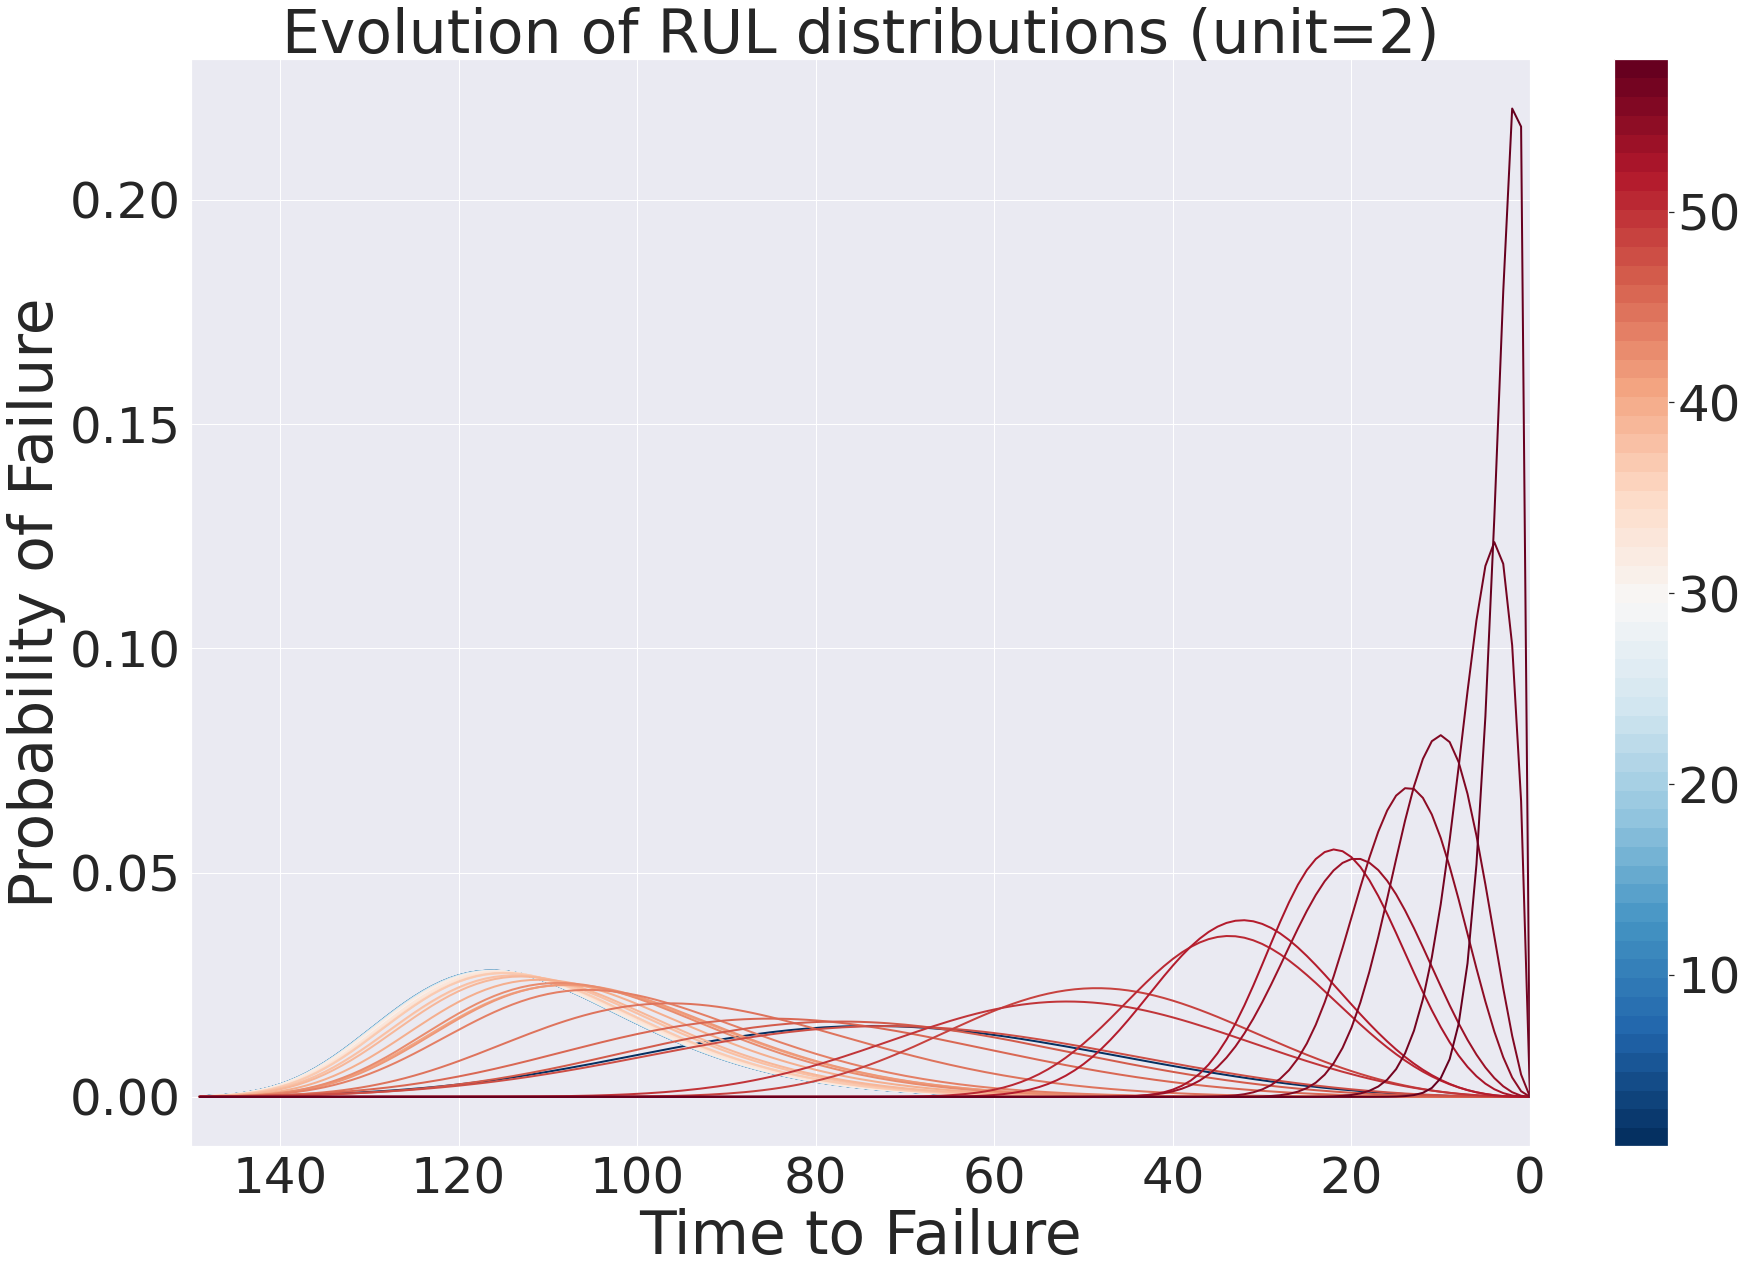

In [71]:
plot_weibull_predictions(s, u)

***

### Confidence Intervals

In [79]:
# for i in test_results_df_or.index:
#     print(f'prediction: {i} --> alpha CI: [{test_results_df_or.iloc[i]["mean_alpha"] - 1.96*test_results_df_or.iloc[i]["std_alpha"]},\
#           {test_results_df_or.iloc[i]["mean_alpha"] + 1.96*test_results_df_or.iloc[i]["std_alpha"]}]')
#     print(f'prediction: {i} --> beta CI: [{test_results_df_or.iloc[i]["mean_beta"] - 1.96*test_results_df_or.iloc[i]["std_beta"]}, \
#           {test_results_df_or.iloc[i]["mean_beta"] + 1.96*test_results_df_or.iloc[i]["std_beta"]}]')
#     print('\n')

In [80]:
survs = pd.DataFrame()

a,b,c = 80,2,3

t=np.arange(0,150)
median_alpha, median_beta, std_alpha, std_beta = test_results_df.iloc[a][['median_alpha', 'median_beta', 'std_alpha', 'std_beta']]

survs['mean'] = surv(median_alpha, median_beta, t)
survs['mean+std'] = surv(median_alpha+1.96*std_alpha/np.sqrt(reps), median_beta+1.96*std_beta/np.sqrt(reps), t)
survs['mean-std'] = surv(median_alpha-1.96*std_alpha/np.sqrt(reps), median_beta-1.96*std_beta/np.sqrt(reps), t)

survs1 = pd.DataFrame()

median_alpha, median_beta, std_alpha, std_beta = test_results_df.iloc[b][['median_alpha', 'median_beta', 'std_alpha', 'std_beta']]

survs1['mean'] = surv(median_alpha, median_beta, t)
survs1['mean+std'] = surv(median_alpha+1.96*std_alpha/np.sqrt(reps), median_beta+1.96*std_beta/np.sqrt(reps), t)
survs1['mean-std'] = surv(median_alpha-1.96*std_alpha/np.sqrt(reps), median_beta-1.96*std_beta/np.sqrt(reps), t)

survs2 = pd.DataFrame()

median_alpha, median_beta, std_alpha, std_beta = test_results_df.iloc[c][['median_alpha', 'median_beta', 'std_alpha', 'std_beta']]

survs2['mean'] = surv(median_alpha, median_beta, t)
survs2['mean+std'] = surv(median_alpha+1.96*std_alpha/np.sqrt(reps), median_beta+1.96*std_beta/np.sqrt(reps), t)
survs2['mean-std'] = surv(median_alpha-1.96*std_alpha/np.sqrt(reps), median_beta-1.96*std_beta/np.sqrt(reps), t)

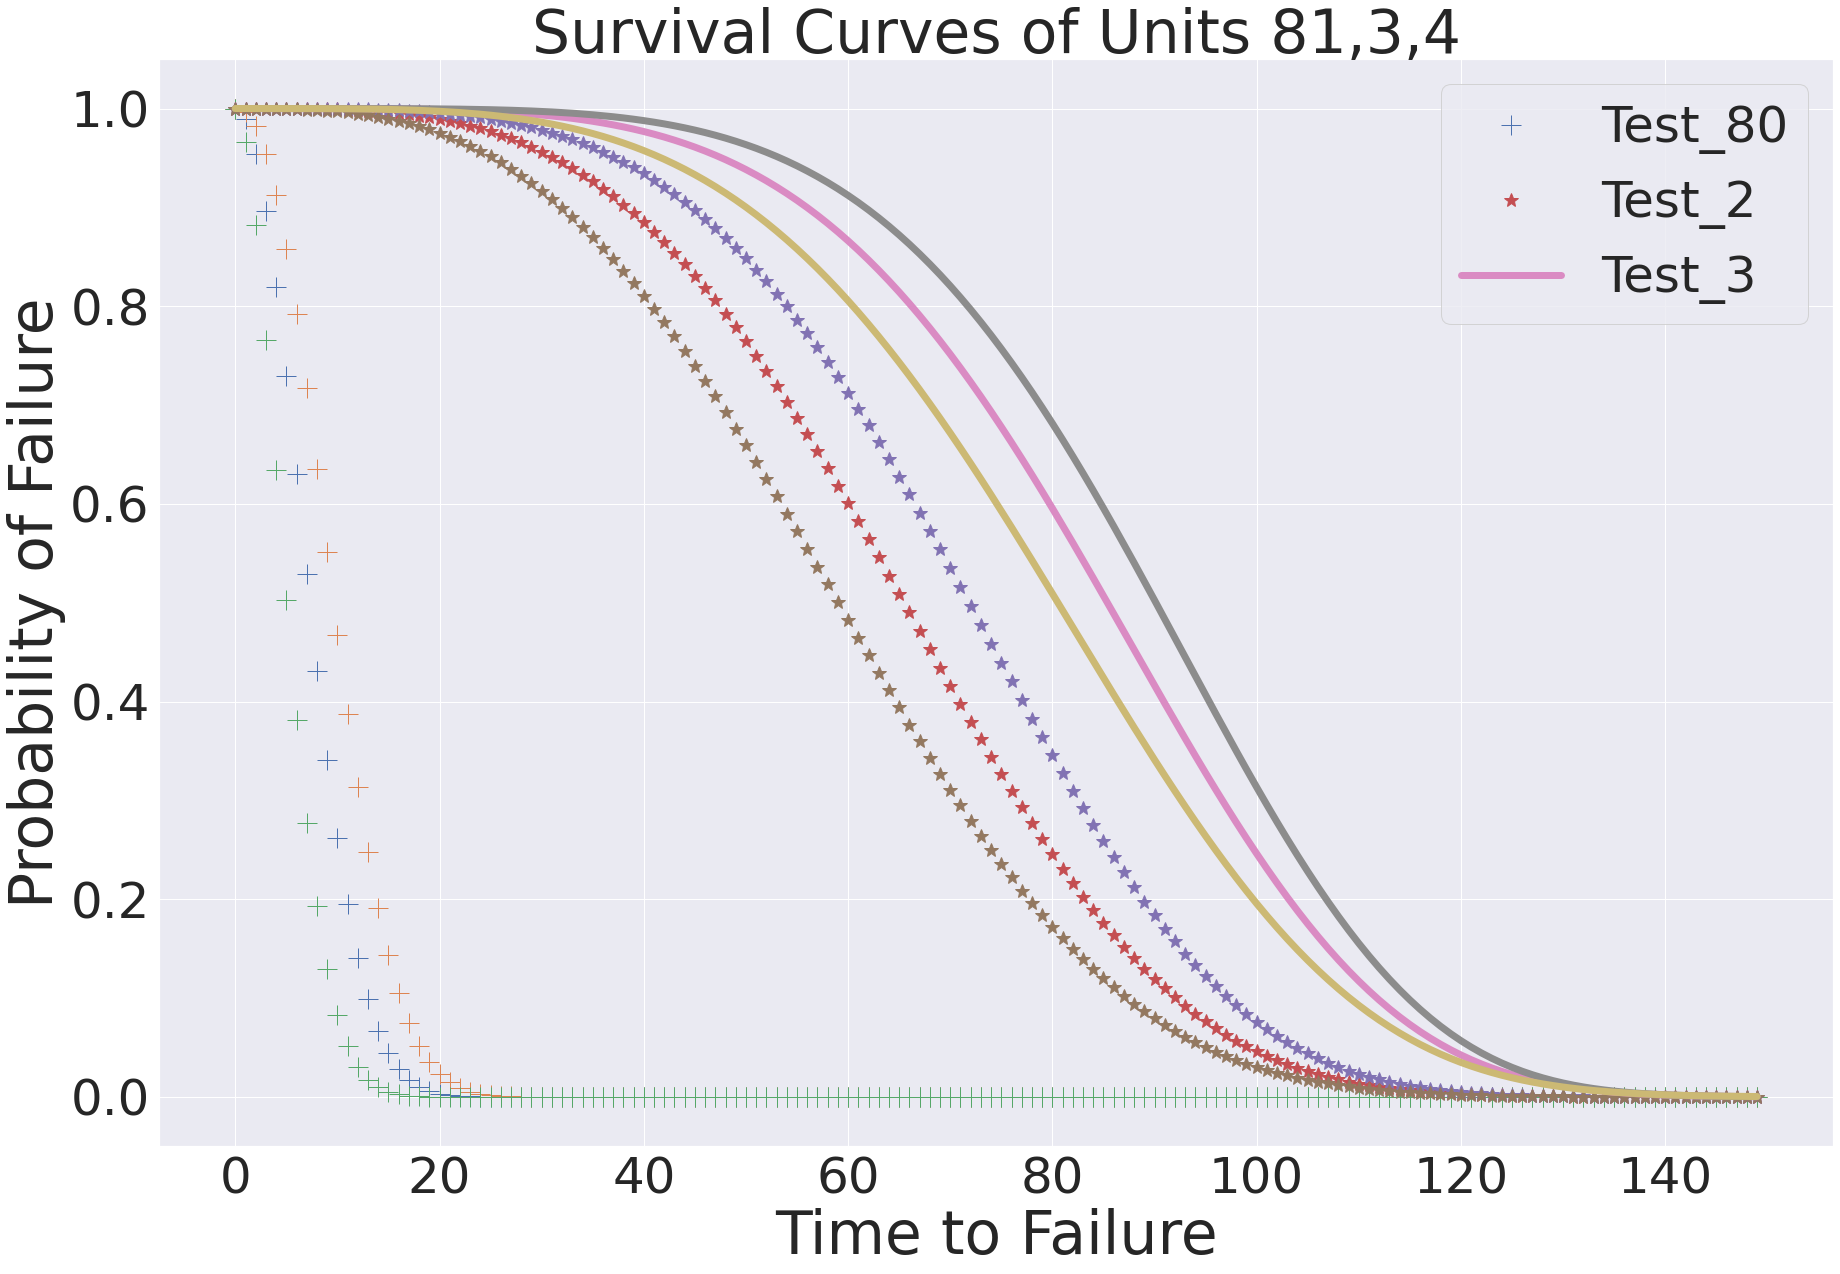

In [81]:
plt.subplots(figsize=(30, 20))

plt.plot(t, survs['mean'], '+', label='Test_'+str(a), markersize=20)
plt.plot(t, survs['mean+std'], '+', markersize=20)
plt.plot(t, survs['mean-std'], '+', markersize=20)

plt.plot(t, survs1['mean'], '*', label='Test_'+str(b), markersize=15)
plt.plot(t, survs1['mean+std'], '*', markersize=15)
plt.plot(t, survs1['mean-std'], '*', markersize=15)

plt.plot(t, survs2['mean'], label='Test_'+str(c), linewidth=7)
plt.plot(t, survs2['mean+std'], linewidth=7)
plt.plot(t, survs2['mean-std'], linewidth=7)

plt.legend(prop={'size': 50})

plt.title(f'Survival Curves of Units {a+1},{b+1},{c+1}', fontsize=60)
plt.xlabel('Time to Failure', fontsize=60)
plt.ylabel('Probability of Failure', fontsize=60)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

plt.savefig('./paper_figures/cmapss_1_SC.pdf', format='pdf')


Correcting the CI for the **median** (before I did mean)

In [108]:
np.hstack(test_predict_1).shape

(100, 30)

In [101]:
test_predict_1_median = np.median(np.hstack(test_predict_1), axis=1)

In [102]:
test_predict_1_median.shape

(100,)

In [103]:
test_predict_1_median[0]

117.326004

In [90]:
test_predict_1 = np.array(test_predict_1)
test_predict_2 = np.array(test_predict_2)
train_predict_1 = np.array(train_predict_1)
train_predict_2 = np.array(test_predict_2)

In [91]:
test_results_df.shape

(100, 7)

In [92]:
test_results_df

,T,median_alpha,median_beta,std_alpha,std_beta,predicted_mu,uncertainty
0,112.0,117.326004,8.859082,0.891125,0.198406,111.023828,0.544766
1,98.0,111.737297,7.759041,6.915524,1.221020,105.070308,4.068273
2,69.0,72.655594,3.518661,17.143259,1.256303,65.390131,9.199781
3,82.0,92.702820,4.458680,12.137189,1.404909,84.552833,6.771049
4,91.0,102.355972,6.030251,10.652955,1.607967,94.984031,6.130461
...,...,...,...,...,...,...,...
95,137.0,116.589043,8.710210,2.619685,0.513310,110.240475,1.566497
96,82.0,111.000687,7.567082,6.872509,1.292508,104.247758,4.082508
97,59.0,90.367889,4.018230,14.803615,1.211929,81.930876,8.007771
98,117.0,117.396118,8.869724,0.807157,0.174503,111.096278,0.490830


In [104]:
A = test_predict_1

In [105]:
A.shape

(30, 100, 1)

In [106]:
B = np.hstack(A)

In [107]:
B.shape

(100, 30)

In [109]:
C = B[0,:]

In [110]:
C

array([117.552284, 115.104546, 117.639175, 116.77442 , 117.59711 ,
       115.94516 , 116.46118 , 116.541695, 117.63689 , 116.77851 ,
       116.75441 , 117.69998 , 116.54259 , 117.58503 , 117.68844 ,
       114.71135 , 117.9682  , 117.09972 , 116.69361 , 117.7653  ,
       117.8542  , 117.858795, 117.066216, 116.63156 , 117.90423 ,
       114.920296, 116.3181  , 117.5873  , 117.58036 , 117.83939 ],
      dtype=float32)

In [111]:
C_ = sorted(C)

In [112]:
np.median(C_)

117.326004

In [113]:
np.median(C)

117.326004

In [114]:
i = int(30*0.5 - 1.96*np.sqrt(30*0.5*0.5))
j =int(30*0.5 + 1.96*np.sqrt(30*0.5*0.5))

print(f'i is {i} and X_i is {C_[i]} and j is {j} and X_j is {C_[j]}')

i is 9 and X_i is 116.69361114501953 and j is 20 and X_j is 117.63688659667969


In [41]:
survs = pd.DataFrame()

a,b,c = 80,2,3


A = np.hstack(test_predict_1)
B = np.hstack(test_predict_2)

i = int(30*0.5 - 1.96*np.sqrt(30*0.5*0.5))  # lower
j = int(30*0.5 + 1.96*np.sqrt(30*0.5*0.5))  # upper

t=np.arange(0,150)


A_ = sorted(A[a,:])
B_ = sorted(B[a,:])
median_alpha, median_beta, std_alpha, std_beta = test_results_df.iloc[a][['median_alpha', 'median_beta', 'std_alpha', 'std_beta']]

survs['median'] = surv(median_alpha, median_beta, t)
survs['median_upper'] = surv(A_[j], B_[j], t)
survs['median_lower'] = surv(A_[i], B_[i], t)

survs1 = pd.DataFrame()

A_ = sorted(A[b,:])
B_ = sorted(B[b,:])

median_alpha, median_beta, std_alpha, std_beta = test_results_df.iloc[b][['median_alpha', 'median_beta', 'std_alpha', 'std_beta']]

survs1['median'] = surv(median_alpha, median_beta, t)
survs1['median_upper'] = surv(A_[j], B_[j], t)
survs1['median_lower'] = surv(A_[i], B_[i], t)

survs2 = pd.DataFrame()
A_ = sorted(A[c,:])
B_ = sorted(B[c,:])

median_alpha, median_beta, std_alpha, std_beta = test_results_df.iloc[c][['median_alpha', 'median_beta', 'std_alpha', 'std_beta']]

survs2['median'] = surv(median_alpha, median_beta, t)
survs2['median_upper'] = surv(A_[j], B_[j], t)
survs2['median_lower'] = surv(A_[i], B_[i], t)

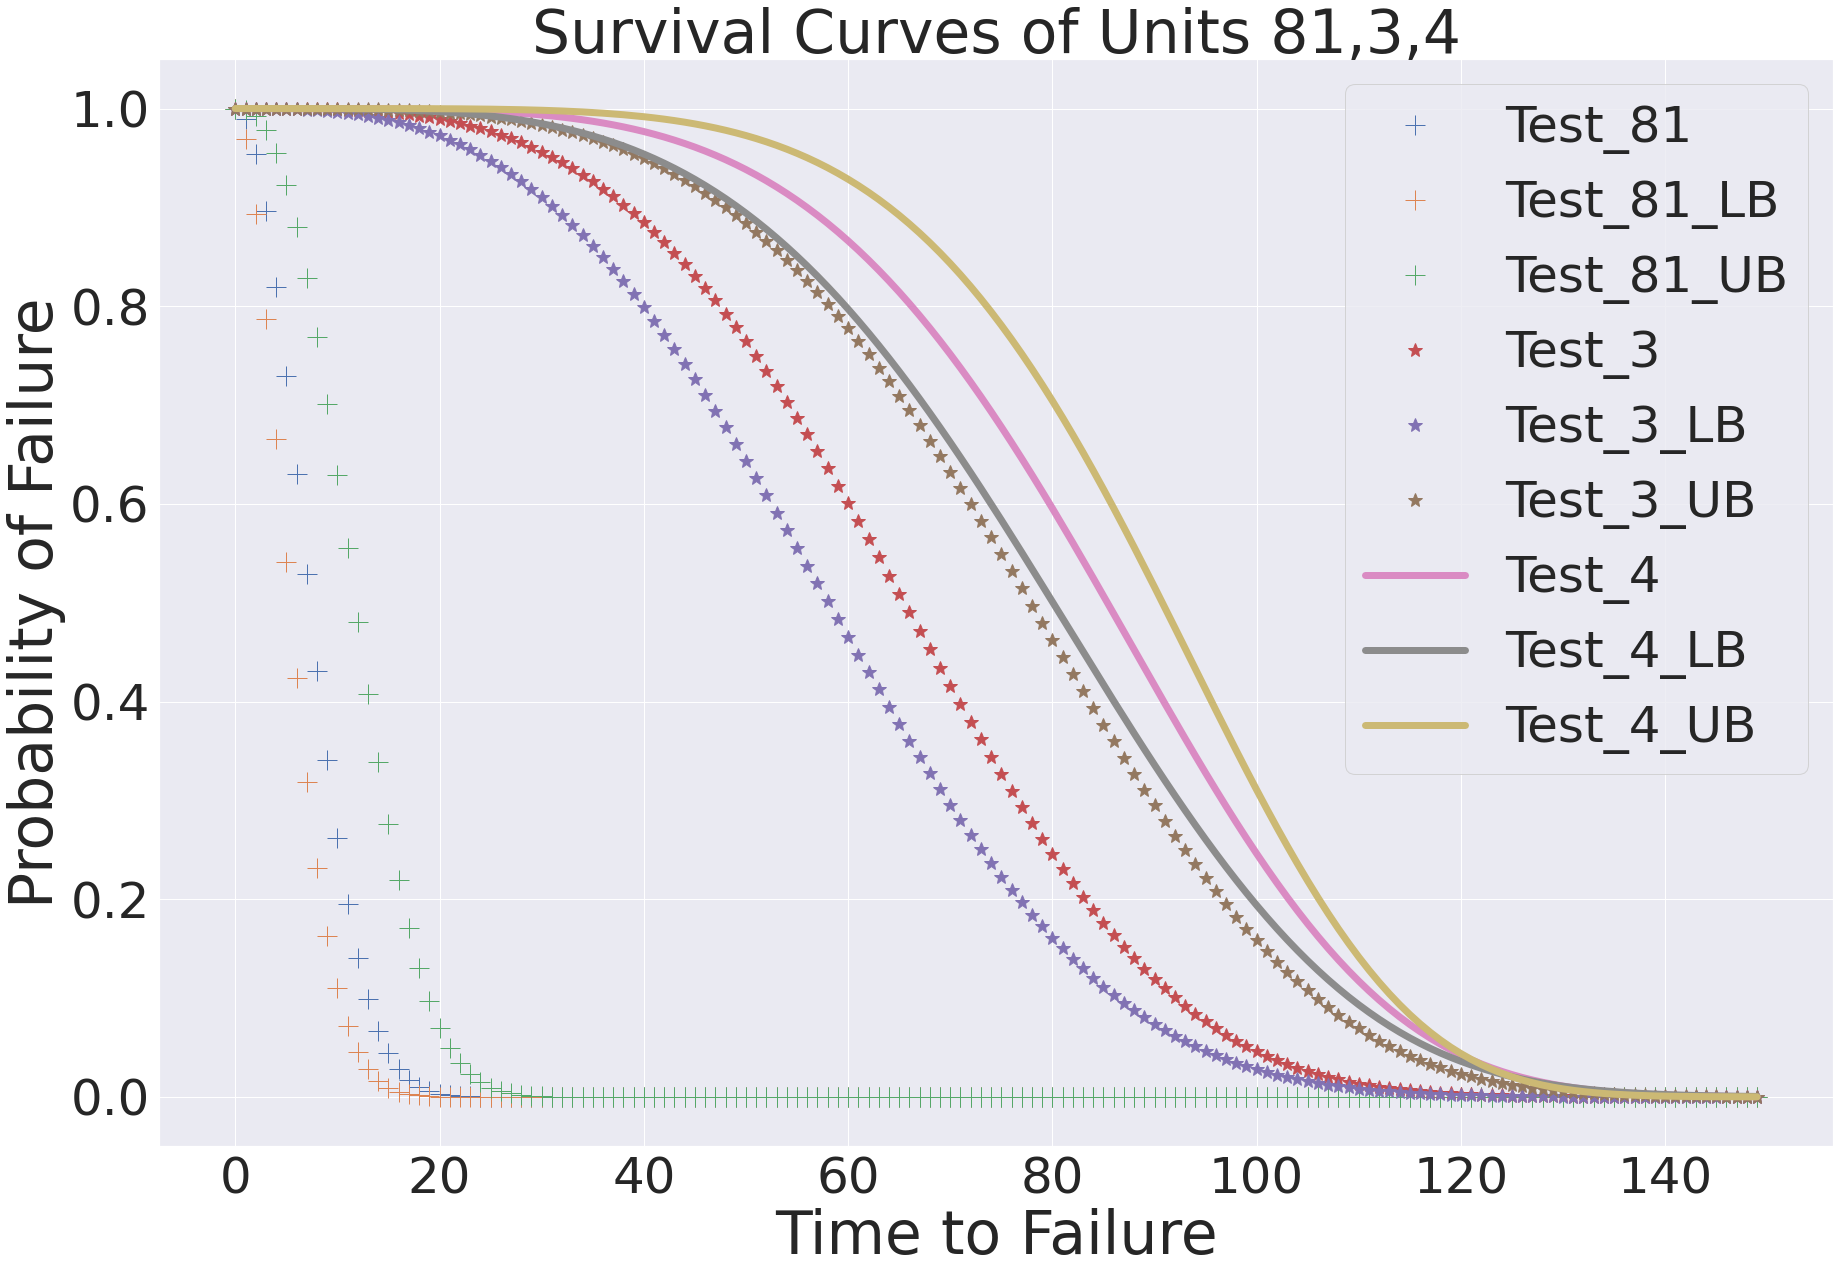

In [46]:
plt.subplots(figsize=(30, 20))

plt.plot(t, survs['median'], '+', label='Test_'+str(a+1), markersize=20)
plt.plot(t, survs['median_lower'], '+', label='Test_'+str(a+1)+'_LB', markersize=20)
plt.plot(t, survs['median_upper'], '+', label='Test_'+str(a+1)+'_UB',markersize=20)

plt.plot(t, survs1['median'], '*', label='Test_'+str(b+1), markersize=15)
plt.plot(t, survs1['median_lower'], '*', label='Test_'+str(b+1)+'_LB',markersize=15)
plt.plot(t, survs1['median_upper'], '*', label='Test_'+str(b+1)+'_UB',markersize=15)

plt.plot(t, survs2['median'], label='Test_'+str(c+1), linewidth=7)
plt.plot(t, survs2['median_lower'], label='Test_'+str(c+1)+'_LB',linewidth=7)
plt.plot(t, survs2['median_upper'], label='Test_'+str(c+1)+'_UB',linewidth=7)

plt.legend(prop={'size': 50})

plt.title(f'Survival Curves of Units {a+1},{b+1},{c+1}', fontsize=60)
plt.xlabel('Time to Failure', fontsize=60)
plt.ylabel('Probability of Failure', fontsize=60)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

plt.savefig('./paper_figures/cmapss_1_SC_median.pdf', format='pdf')


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

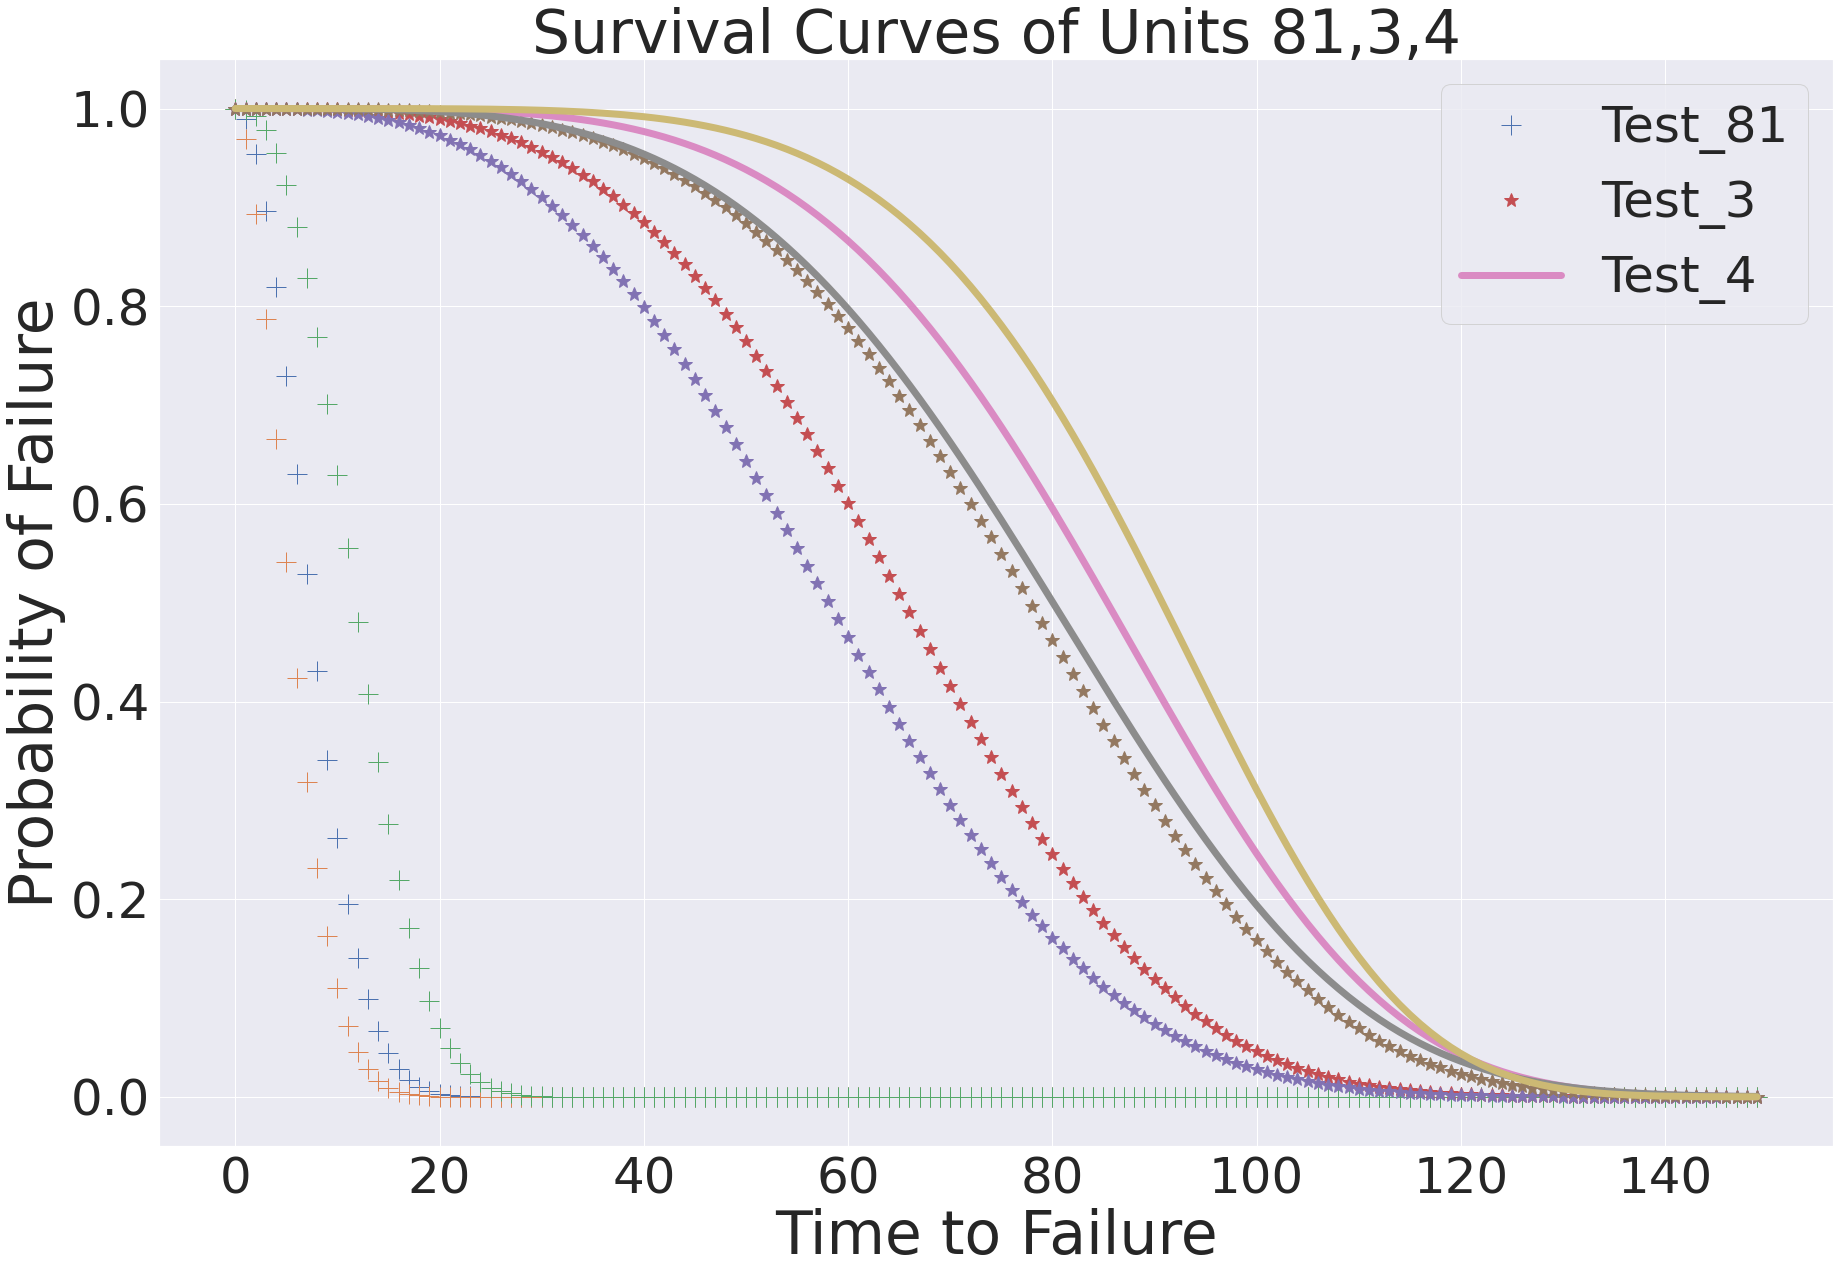

In [43]:
plt.subplots(figsize=(30, 20))

plt.plot(t, survs['median'], '+', label='Test_'+str(a+1), markersize=20)
plt.plot(t, survs['median_lower'], '+', markersize=20)
plt.plot(t, survs['median_upper'], '+', markersize=20)

plt.plot(t, survs1['median'], '*', label='Test_'+str(b+1), markersize=15)
plt.plot(t, survs1['median_lower'], '*', markersize=15)
plt.plot(t, survs1['median_upper'], '*', markersize=15)

plt.plot(t, survs2['median'], label='Test_'+str(c+1), linewidth=7)
plt.plot(t, survs2['median_lower'], linewidth=7)
plt.plot(t, survs2['median_upper'], linewidth=7)

plt.legend(prop={'size': 50})

plt.title(f'Survival Curves of Units {a+1},{b+1},{c+1}', fontsize=60)
plt.xlabel('Time to Failure', fontsize=60)
plt.ylabel('Probability of Failure', fontsize=60)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

# plt.savefig('./paper_figures/cmapss_1_SC_median.pdf', format='pdf')
